In [ ]:
# 1️ Unmount if partially mounted
!fusermount -u /content/drive

# 2️ Remove the old drive mount folder completely
!rm -rf /content/drive

# 3️ Now remount cleanly
from google.colab import drive
drive.mount('/content/drive')


fusermount: failed to unmount /content/drive: Invalid argument
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Projects/AI-Powered Trending Product Recommendation & Revenue Forecasting with Customer Segmentation/raw_data/amazon_products_sales_data_cleaned.csv")

In [5]:
df.shape

(42675, 17)

In [6]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 15  product_category   

In [8]:
df.isnull().sum()

,0
product_title,0
product_rating,1024
total_reviews,1024
purchased_last_month,10511
discounted_price,2062
original_price,2062
is_best_seller,0
is_sponsored,0
has_coupon,0
buy_box_availability,14653


In [9]:
df.isnull().sum()/df.shape[0]*100

,0
product_title,0.000000
product_rating,2.399531
total_reviews,2.399531
purchased_last_month,24.630346
discounted_price,4.831869
original_price,4.831869
is_best_seller,0.000000
is_sponsored,0.000000
has_coupon,0.000000
buy_box_availability,34.336262


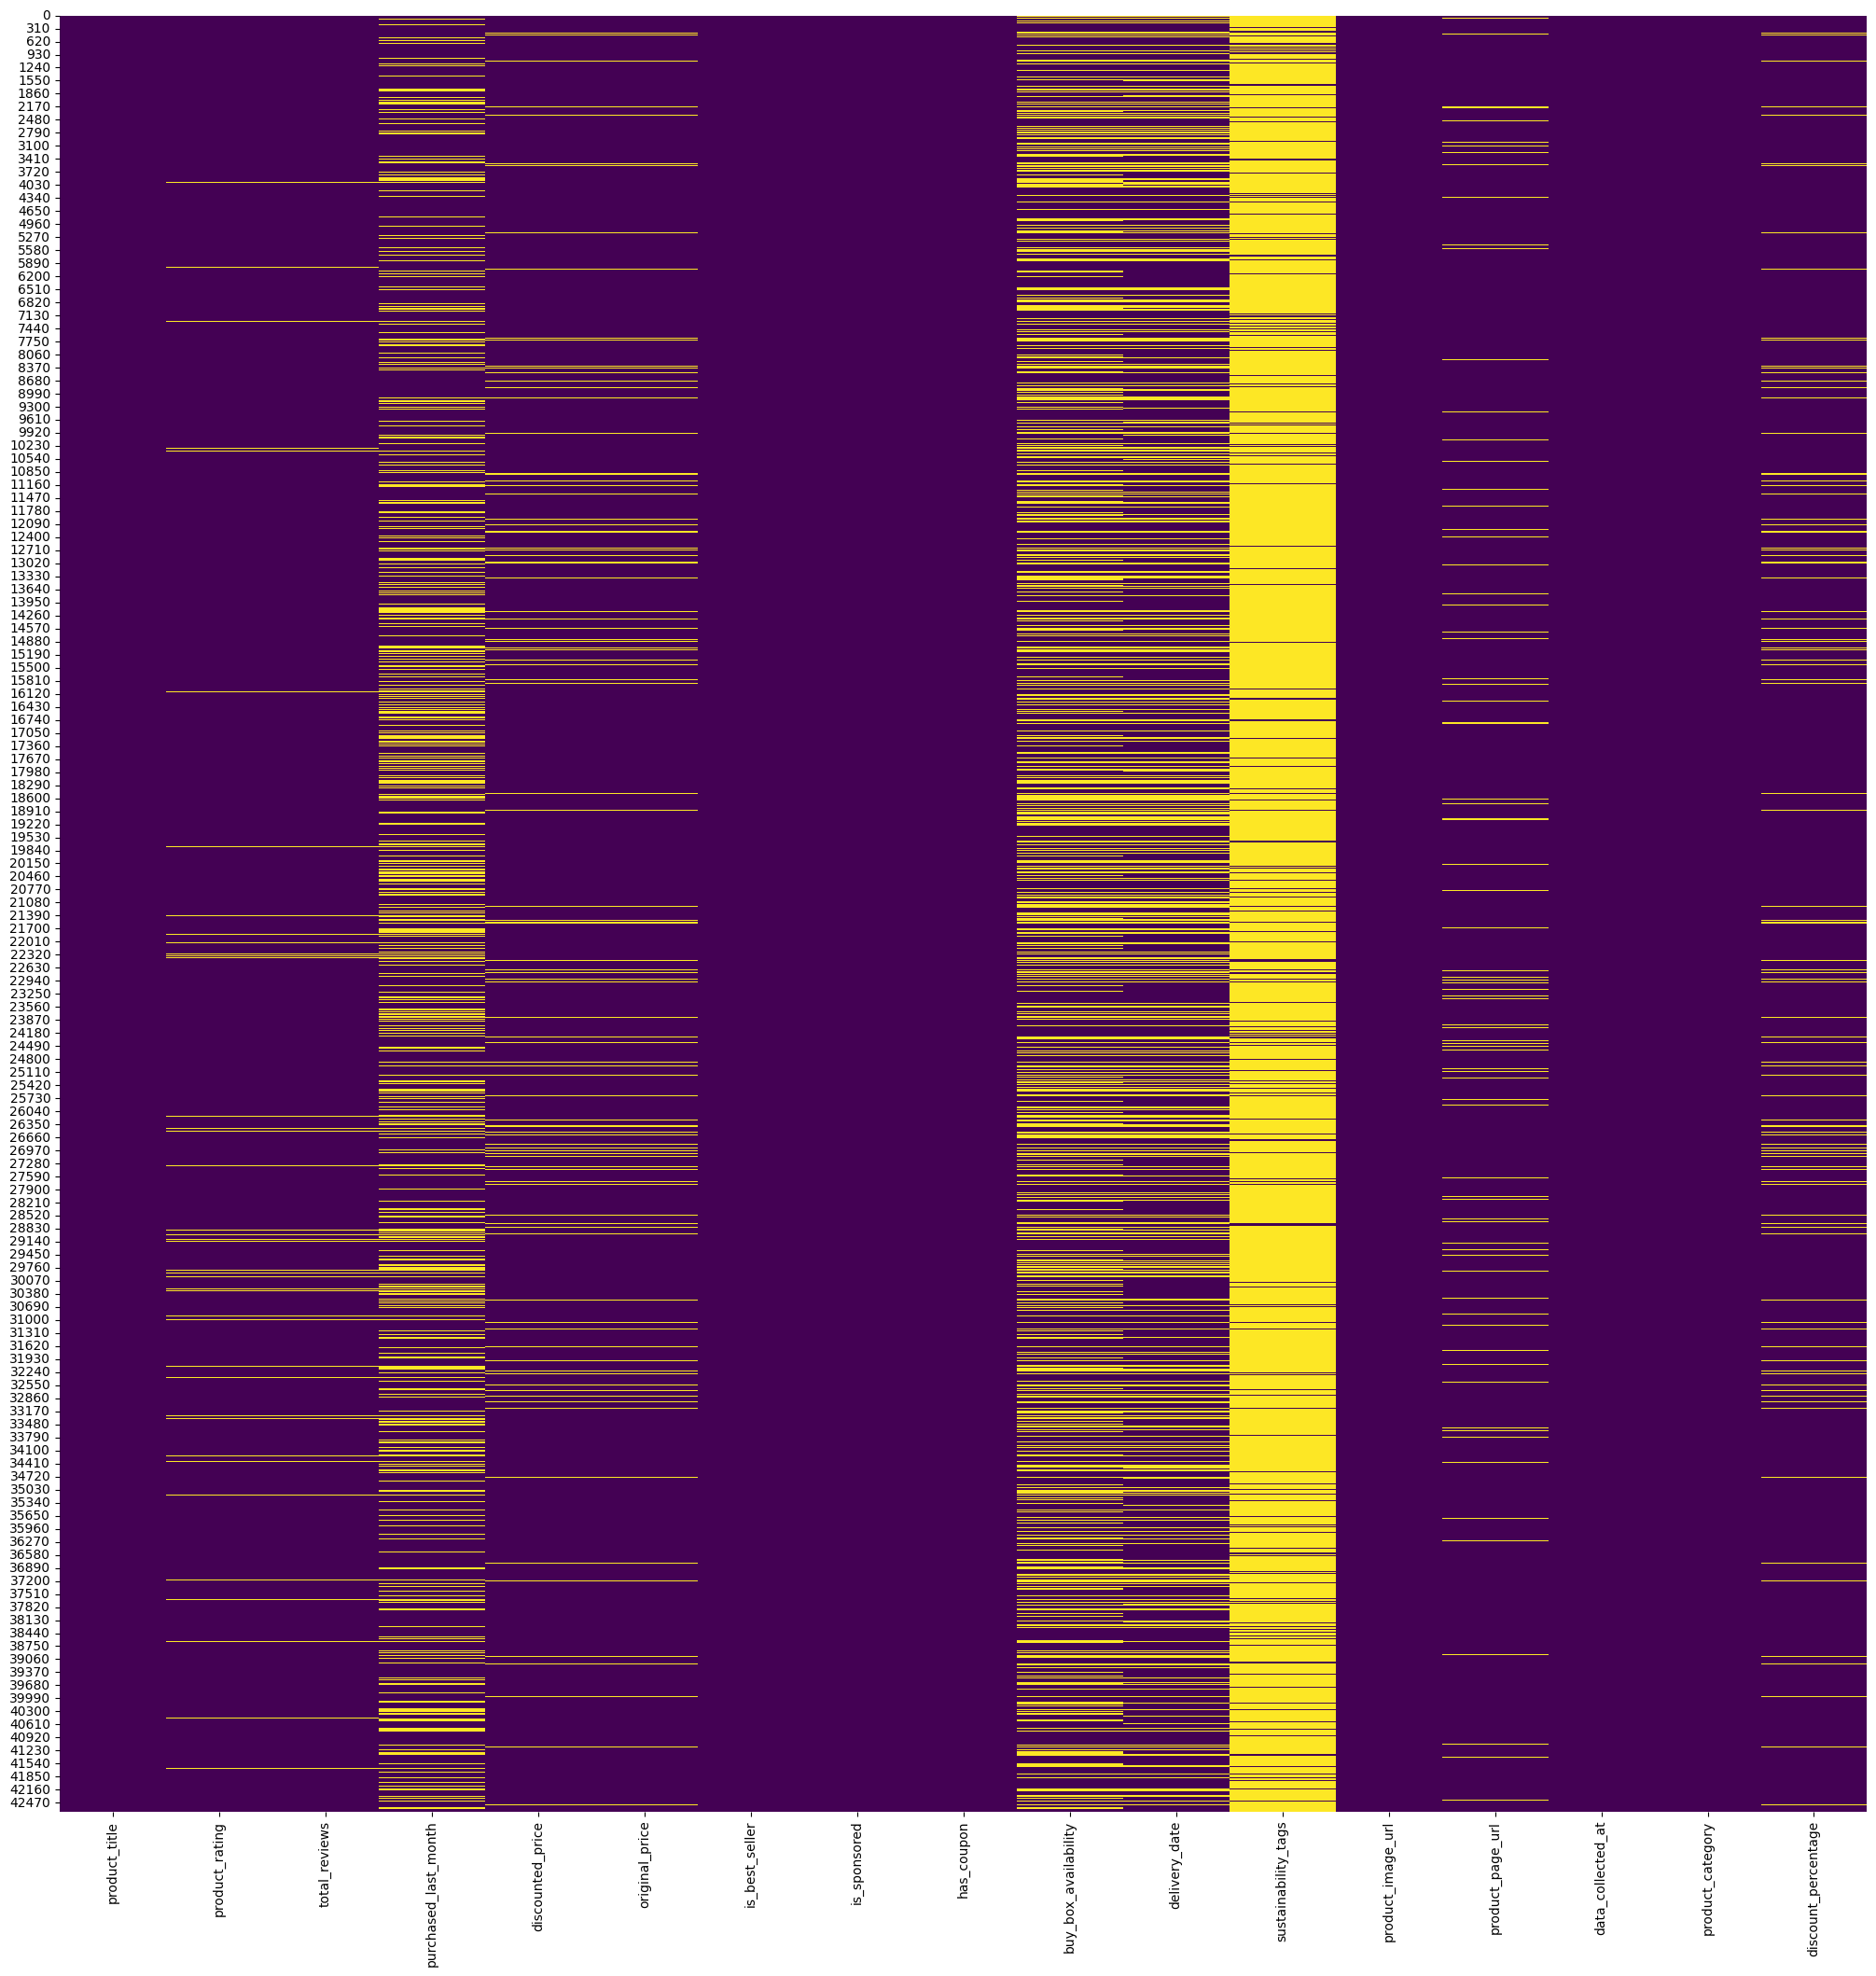

In [10]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")
plt.show()

In [11]:
#drop sustainability_tags column since it contains 92% missingness
df.drop("sustainability_tags",axis=1,inplace=True)

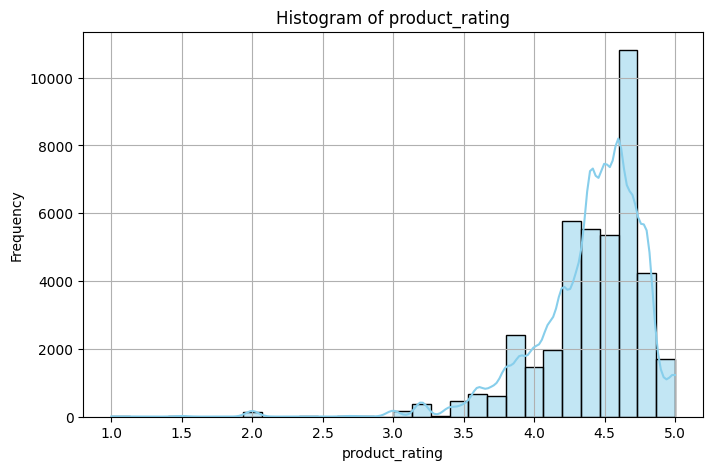

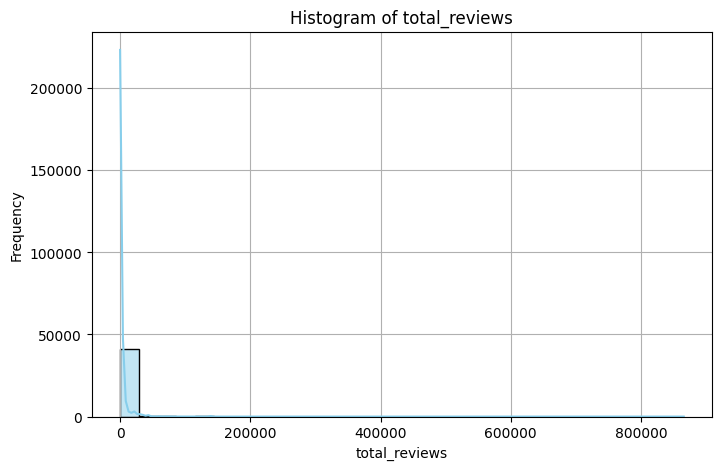

In [12]:
#Columns with low missing values (~2.4%):product_rating,total_reviews
#Let's visualize this columns to know what to impute
columns_to_plot = ['product_rating', 'total_reviews']

for col in columns_to_plot:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# **Observation:**
After plotting histograms for product_rating and total_reviews, we can see that:

product_rating is left-skewed, meaning most ratings are high, with fewer low ratings.

total_reviews is right-skewed, meaning most products have few reviews, but a few have very high review counts.

Since both distributions are skewed, using the median for imputation is appropriate, as it is robust to outliers and better represents the central tendency than the mean

In [13]:
#Fill missing values of product_rating and total reviews with median
df['product_rating'] = df['product_rating'].fillna(df['product_rating'].median())
df['total_reviews'] = df['total_reviews'].fillna(df['total_reviews'].median())

In [14]:
#Fill original_price based on product_title
df['original_price'] = df.groupby('product_title')['original_price'] \
                         .transform(lambda x: x.fillna(x.median()))
# Fill median if still missing
df['original_price'] = df['original_price'].fillna(df['original_price'].median())


In [15]:
# Fill discounted_price
# If missing, assume no discount
# Fill missing discounted_price with original_price
df['discounted_price'] = df['discounted_price'].fillna(df['original_price'])

# Recalculate discount_percentage
df['discount_percentage'] = ((df['original_price'] - df['discounted_price']) / df['original_price']) * 100


In [16]:
# Create missing flag before filling
df['purchased_last_month_missing'] = df['purchased_last_month'].isna().astype(int)

# Fill missing values with 0
df['purchased_last_month'] = df['purchased_last_month'].fillna(0)

In [17]:
# Fill missing buy_box_availability values as "Not Added"
df['buy_box_availability'] = df['buy_box_availability'].fillna("Not Added")

In [18]:
# Create a flag column for missing dates before filling
df['delivery_date_missing'] = df['delivery_date'].isna().astype(int)

# Forward fill
df['delivery_date'] = df['delivery_date'].ffill()

In [19]:
# Fill missing product_page_url values with 'unknown'
df['product_page_url'] = df['product_page_url'].fillna('unknown')

In [20]:
df.isnull().sum()

,0
product_title,0
product_rating,0
total_reviews,0
purchased_last_month,0
discounted_price,0
original_price,0
is_best_seller,0
is_sponsored,0
has_coupon,0
buy_box_availability,0


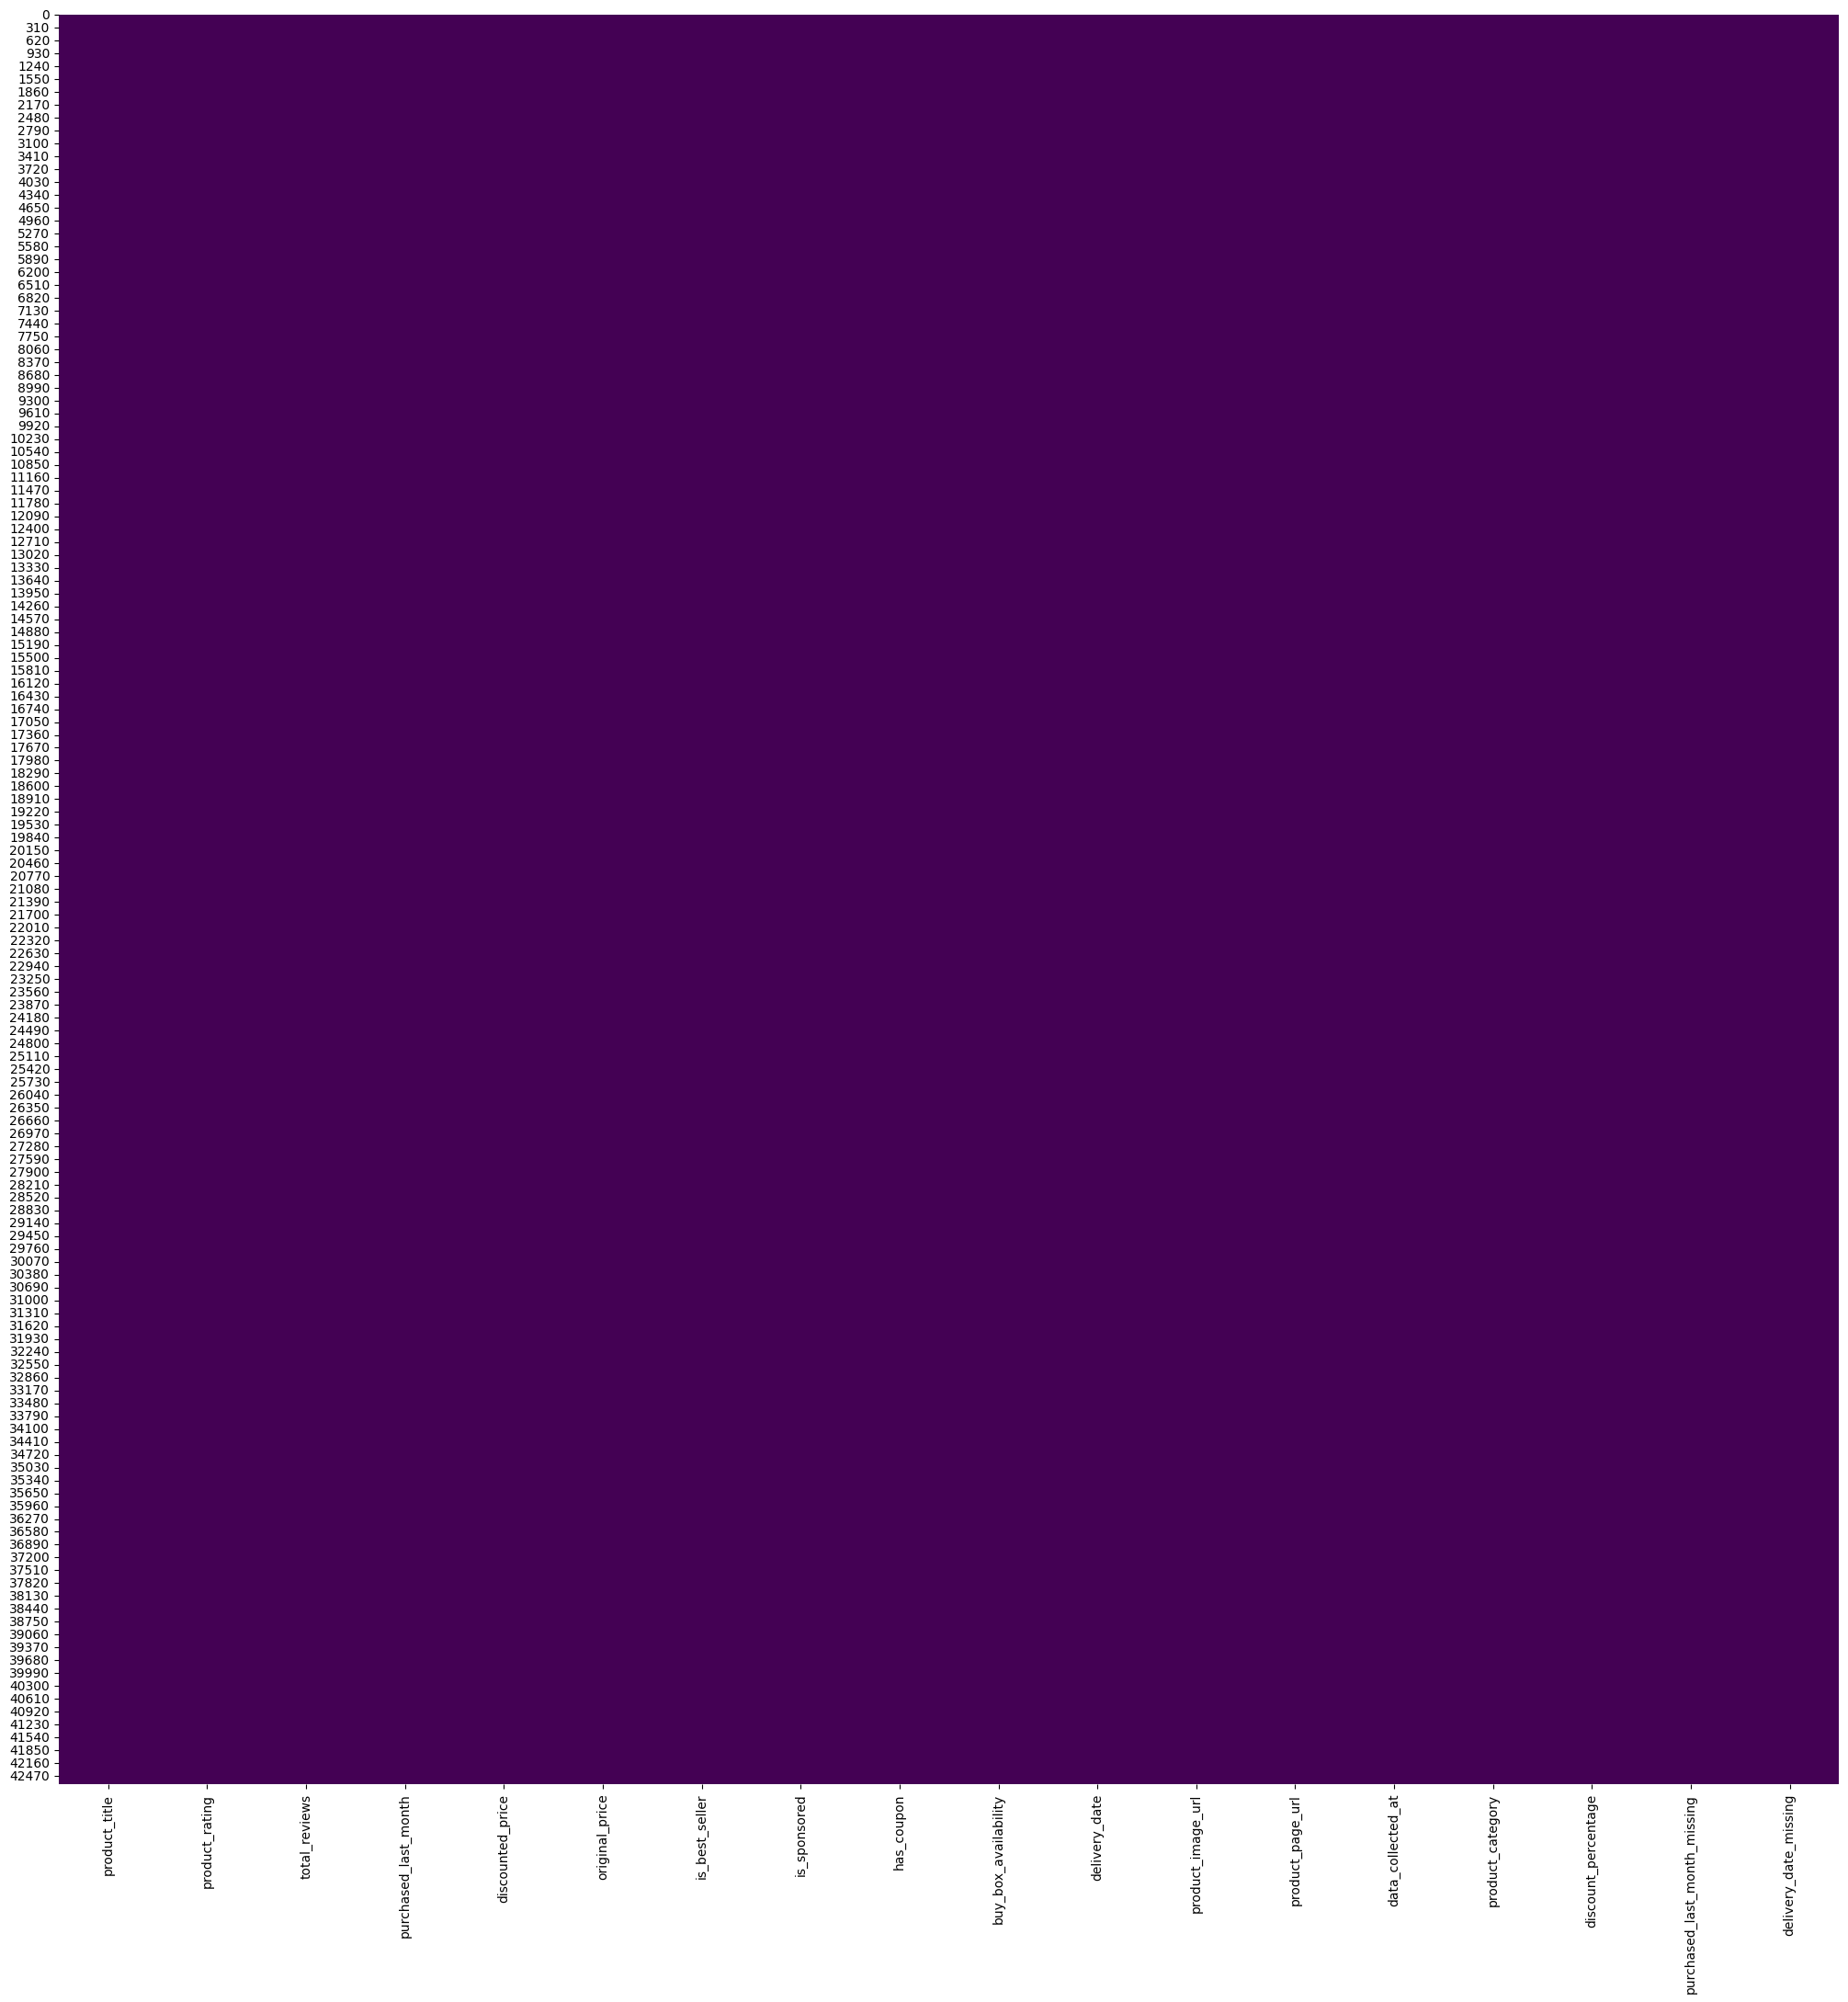

In [21]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")
plt.show()

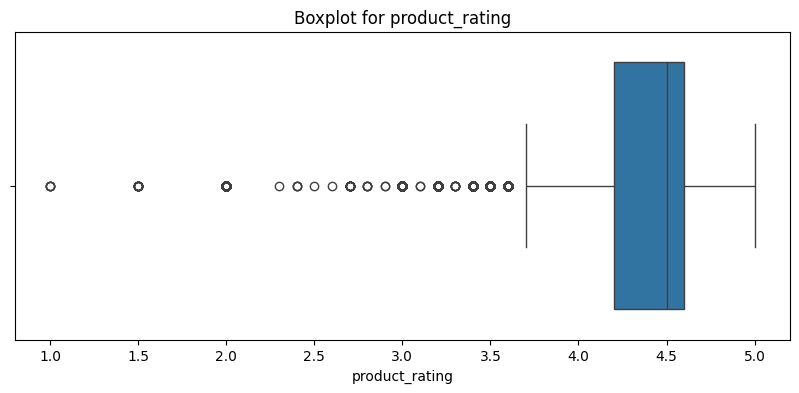

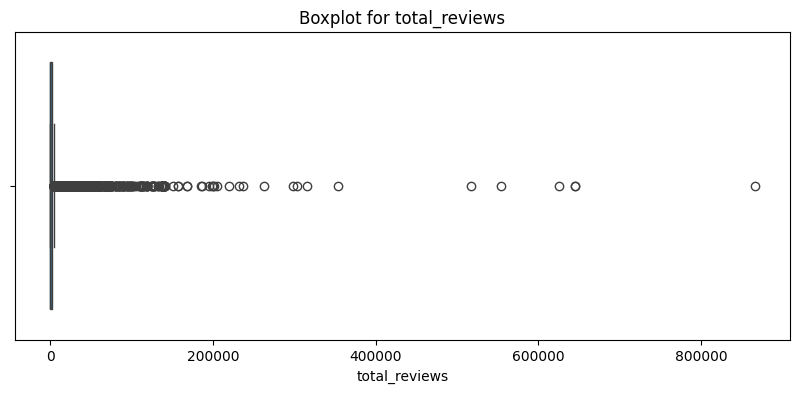

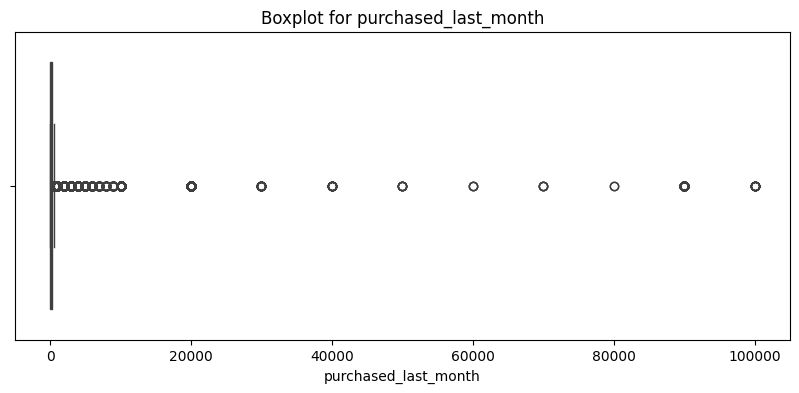

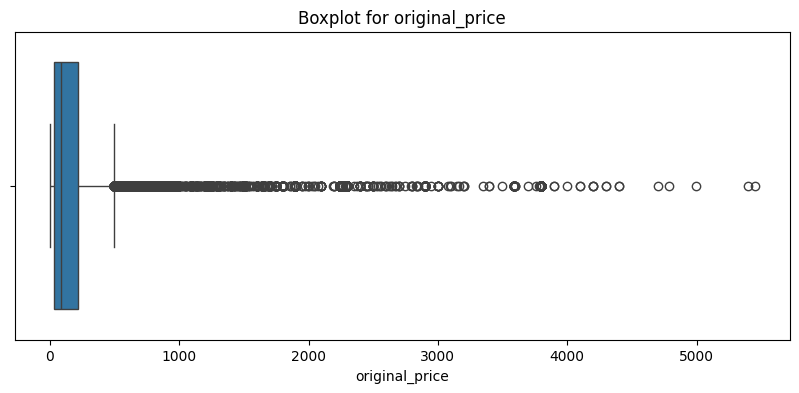

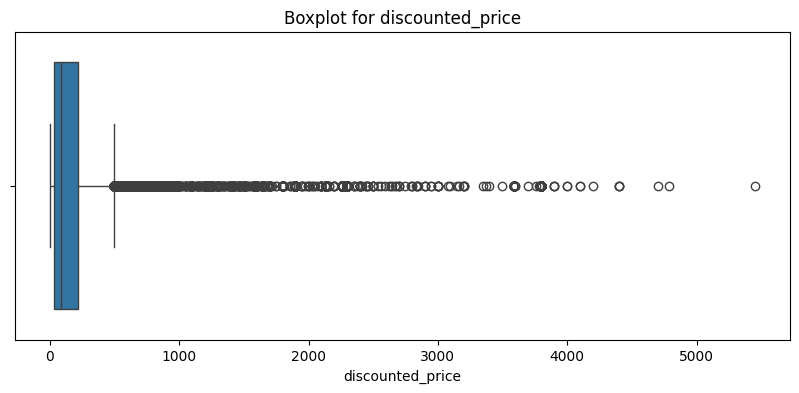

In [22]:
numeric_cols = ['product_rating', 'total_reviews', 'purchased_last_month',
                'original_price', 'discounted_price']

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

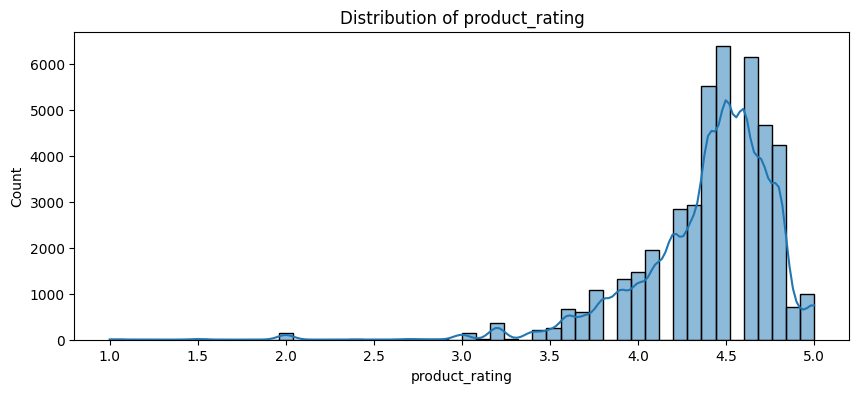

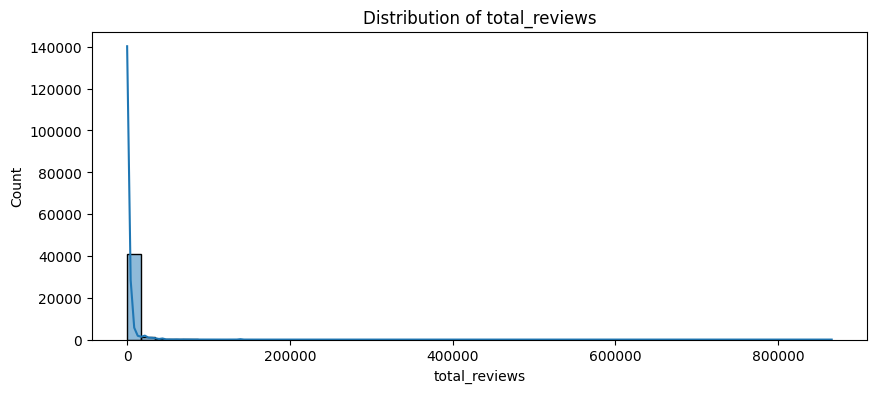

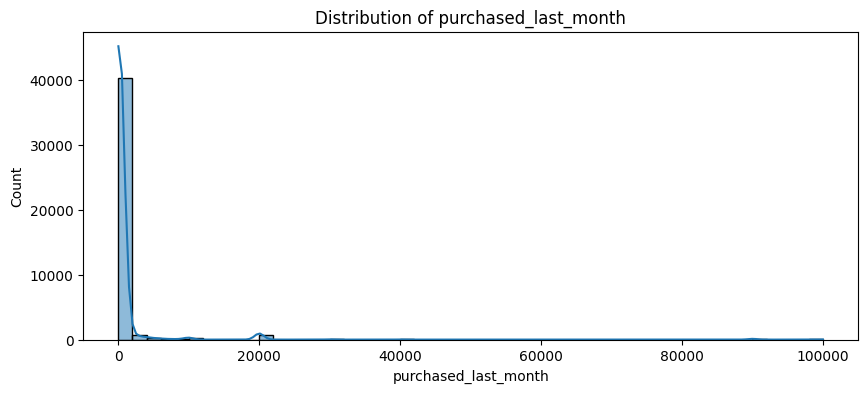

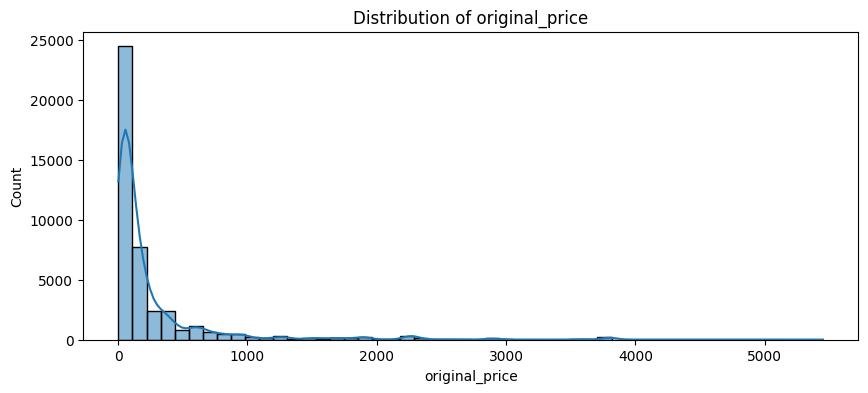

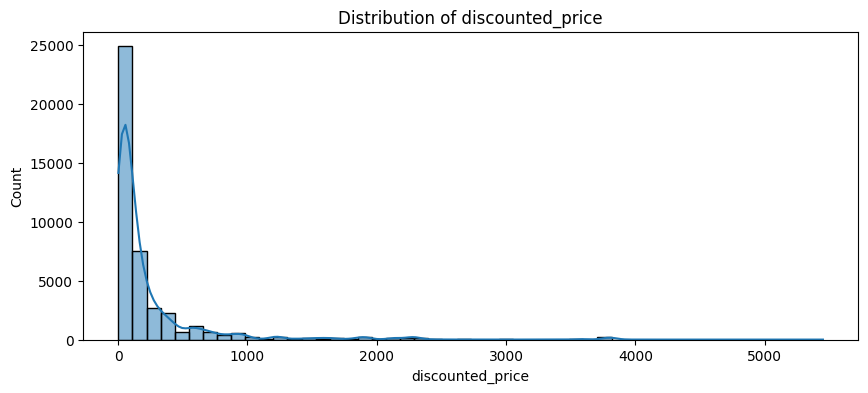

In [23]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()


# **Outlier Observation:**

After analyzing the boxplots and histograms:

**Product Ratings:**
Most ratings are between 3 and 5, and even the lower ratings are valid (1–5 scale).These are genuine user opinions, not errors, so we keep them same.

**Total Reviews:**
Some products have very high review counts.This shows popular or trending products, not incorrect data.Removing them would lose key business insights, so we don’t remove these outliers.

**Purchased Last Month:**
Most products sell a few units, while a few sell thousands.This represents real-world variation — top-selling items are important, not mistakes.Hence, we keep these outliers too.

**Original Price & Discounted Price:**
Prices vary widely depending on the brand and product type (e.g., Apple, premium laptops).High prices are genuine, so we don’t remove outliers.
Instead, we use log transformation to reduce skewness for better visualization and modeling.

# Conclusion
We decided not to remove outliers for any variable because:
They represent real variations in product popularity, sales, and pricing.
Outliers in these features carry valuable insights about top products and premium brands.
Applying log transformation helps normalize the data without losing genuine information.

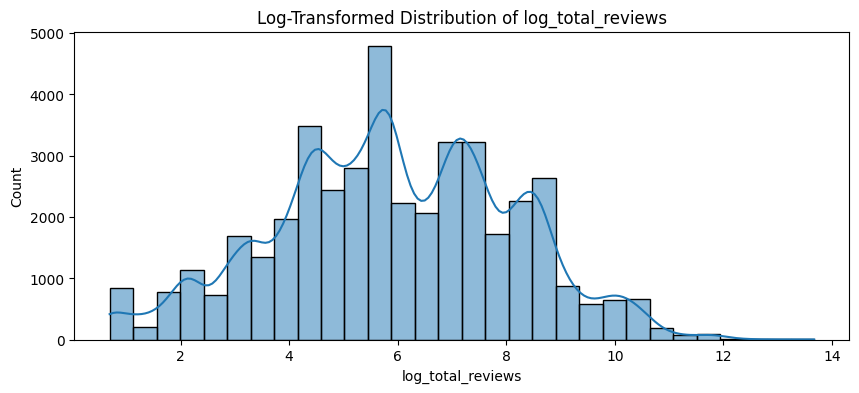

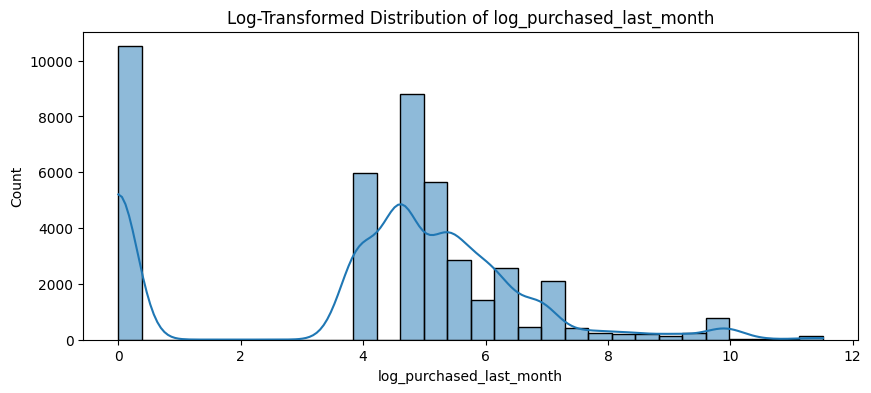

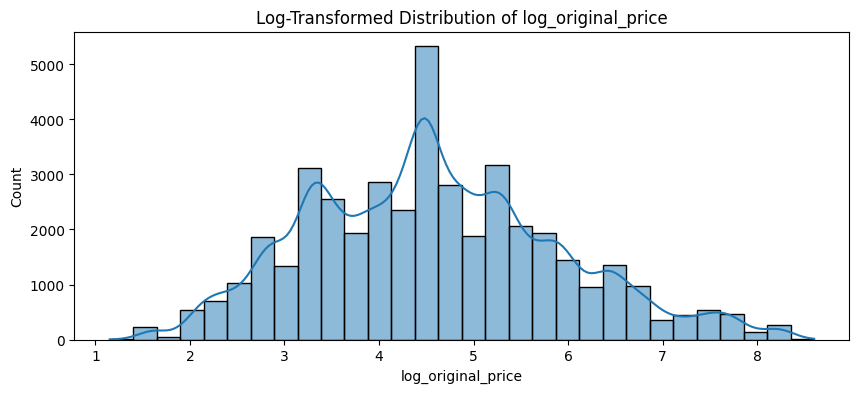

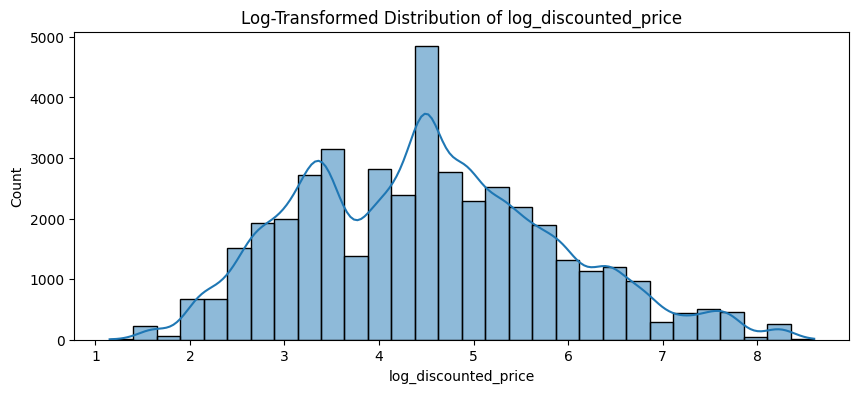

In [24]:
# Apply log transformation to reduce skewness (add 1 to avoid log(0))
df['log_total_reviews'] = np.log1p(df['total_reviews'])
df['log_purchased_last_month'] = np.log1p(df['purchased_last_month'])
df['log_original_price'] = np.log1p(df['original_price'])
df['log_discounted_price'] = np.log1p(df['discounted_price'])

# Visualize transformed distributions
numeric_cols = ['log_total_reviews', 'log_purchased_last_month',
                'log_original_price', 'log_discounted_price']

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Log-Transformed Distribution of {col}')
    plt.show()


# Observation: Log Transformation

The features total_reviews, purchased_last_month, original_price, and discounted_price were highly right-skewed initially.

Applying a log transformation (np.log1p) compressed large values and brought the distributions closer to normal.

This helps improve performance for algorithms sensitive to scale and skewness (e.g., linear regression, clustering).

We used log1p(x) instead of log(x) to safely handle zero values without generating -inf.

In [25]:
# Create revenue column
df['revenue'] = df['purchased_last_month'] * df['discounted_price']

# Check
df[['product_title','purchased_last_month','discounted_price','revenue']].head()

,product_title,purchased_last_month,discounted_price,revenue
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,300.0,89.68,26904.0
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",6000.0,9.99,59940.0
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",2000.0,314.00,628000.0
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",10000.0,162.24,1622400.0
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,10000.0,72.74,727400.0


# **Exploratory Data Analysis**
Revenue & Discount Analysis

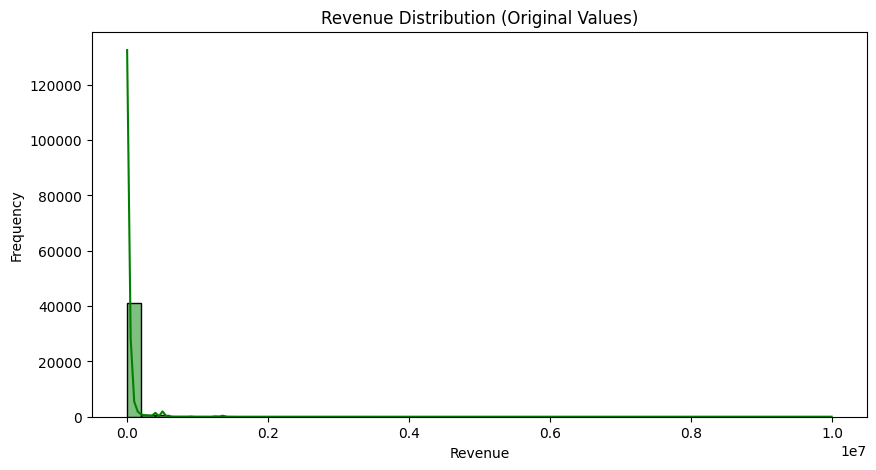

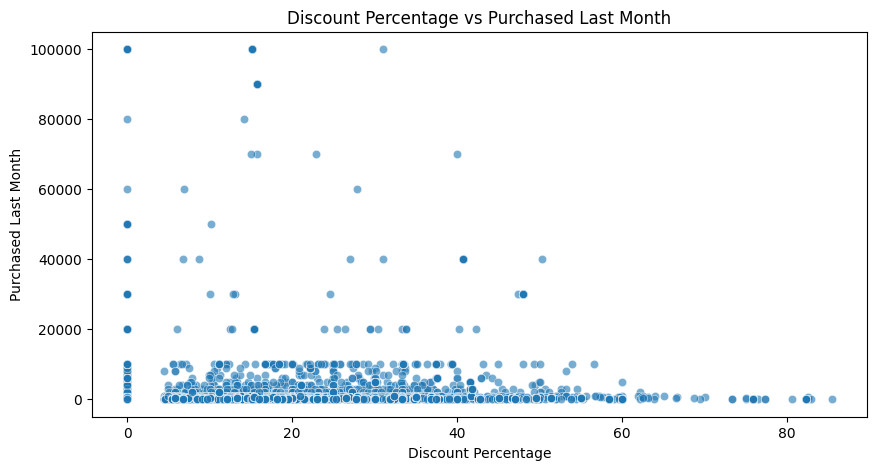

/tmp/ipython-input-798323319.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')


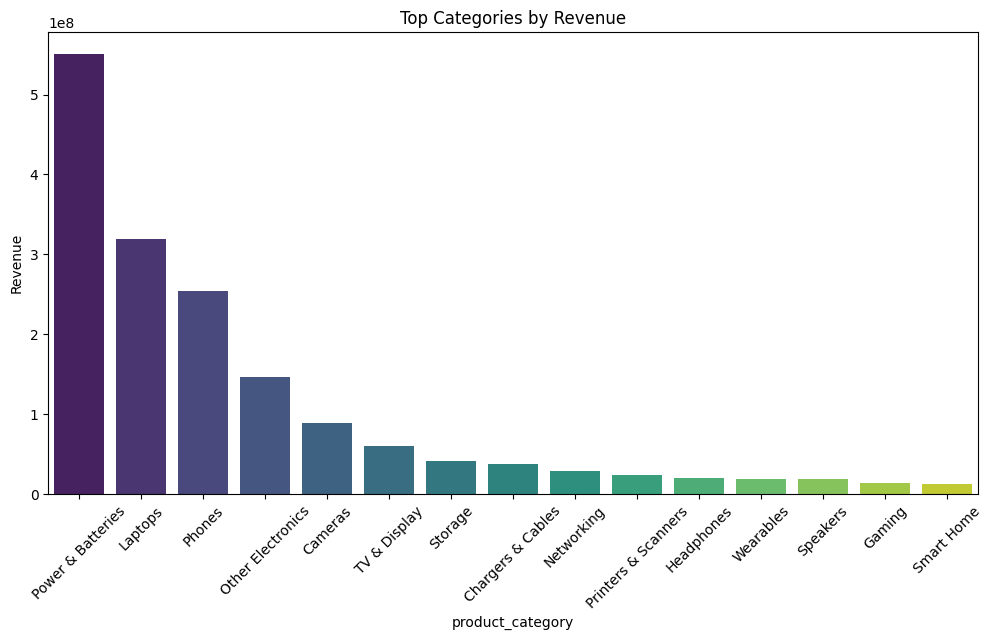

In [26]:
# 1. Revenue distribution
plt.figure(figsize=(10,5))
sns.histplot(df['revenue'], bins=50, kde=True, color='green')
plt.title("Revenue Distribution (Original Values)")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

# 2. Discount vs Purchases
plt.figure(figsize=(10,5))
sns.scatterplot(x='discount_percentage', y='purchased_last_month', data=df, alpha=0.6)
plt.title("Discount Percentage vs Purchased Last Month")
plt.xlabel("Discount Percentage")
plt.ylabel("Purchased Last Month")
plt.show()

# 3. Top categories by revenue
category_revenue = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top Categories by Revenue")
plt.ylabel("Revenue")
plt.show()

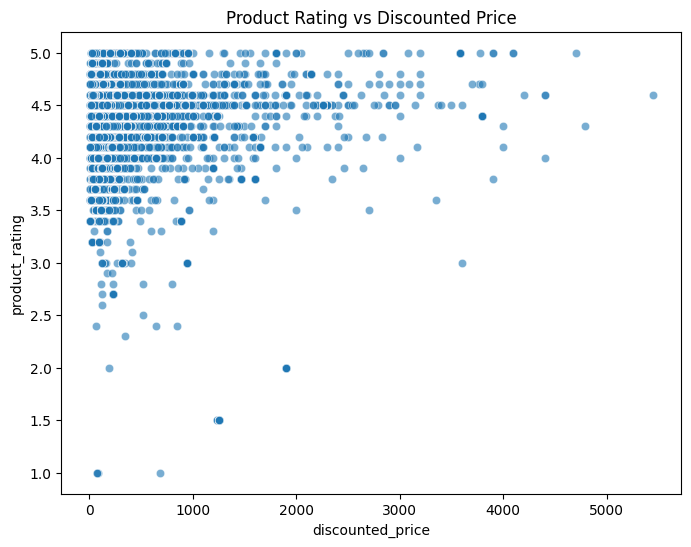

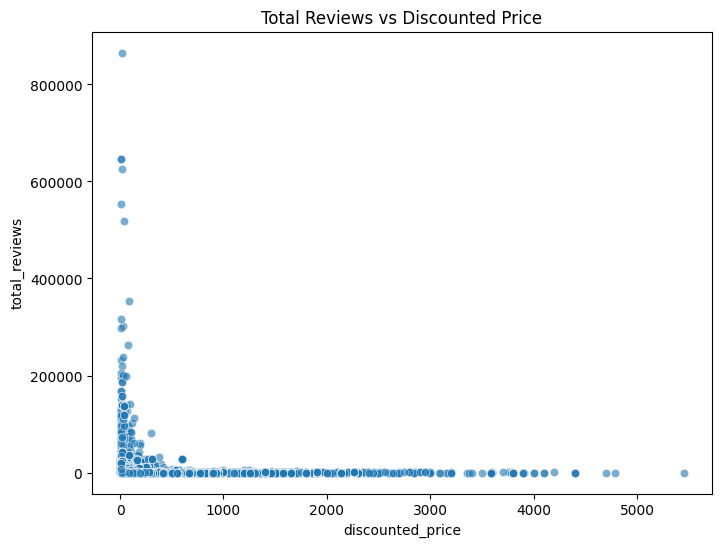

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='discounted_price', y='product_rating', data=df, alpha=0.6)
plt.title('Product Rating vs Discounted Price')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='discounted_price', y='total_reviews', data=df, alpha=0.6)
plt.title('Total Reviews vs Discounted Price')
plt.show()


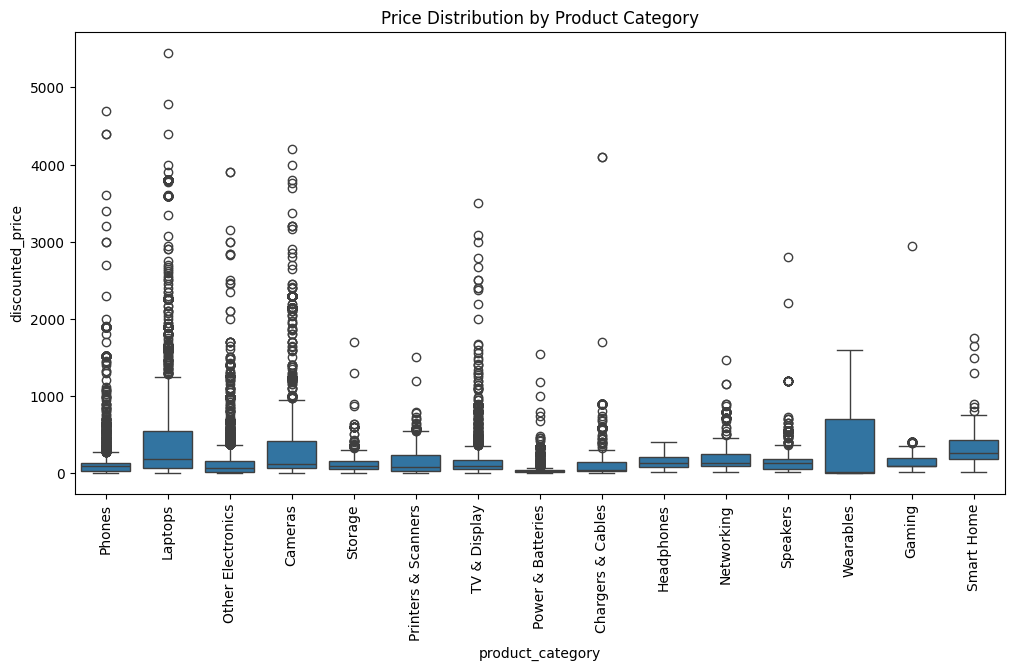

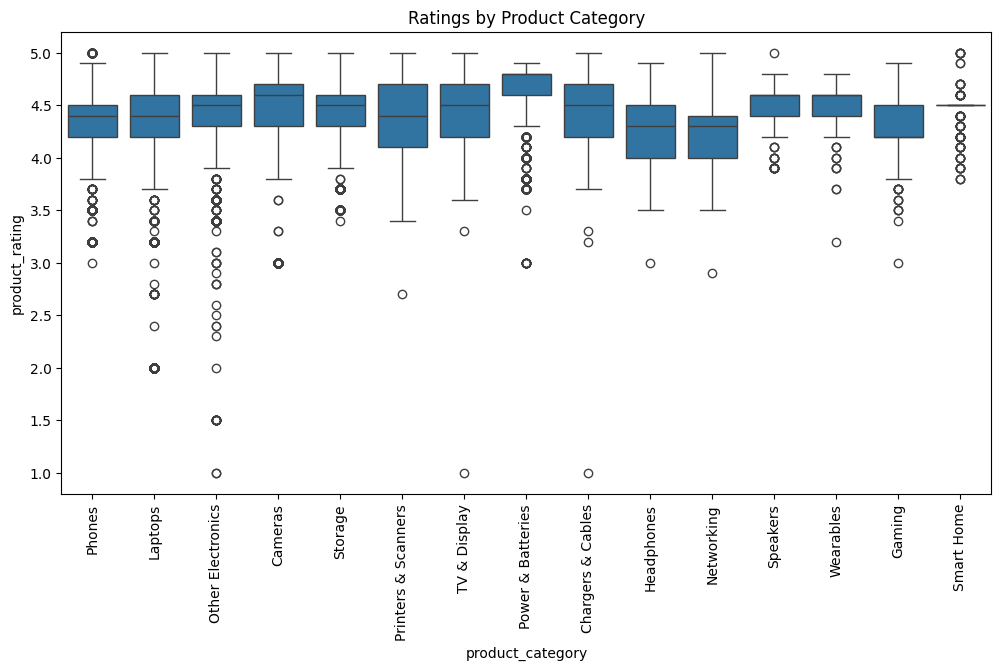

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='product_category', y='discounted_price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Product Category')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='product_category', y='product_rating', data=df)
plt.xticks(rotation=90)
plt.title('Ratings by Product Category')
plt.show()


In [29]:
# Average metrics by product category
category_stats = df.groupby('product_category')[['total_reviews','purchased_last_month','discounted_price']].mean().sort_values(by='purchased_last_month', ascending=False)
display(category_stats.head(10))


,total_reviews,purchased_last_month,discounted_price
product_category,,,
Power & Batteries,7234.620090,9089.833160,54.889204
Wearables,2368.713656,1730.066079,252.457555
Phones,4431.910254,568.269084,152.081906
Chargers & Cables,3995.882160,448.527005,125.629891
Laptops,2065.329576,393.011619,462.523567
Other Electronics,2198.719475,391.296402,144.176736
Printers & Scanners,1596.116306,330.957811,158.100707
Storage,4099.139877,302.852761,136.108227
TV & Display,1721.921673,272.148289,176.465970


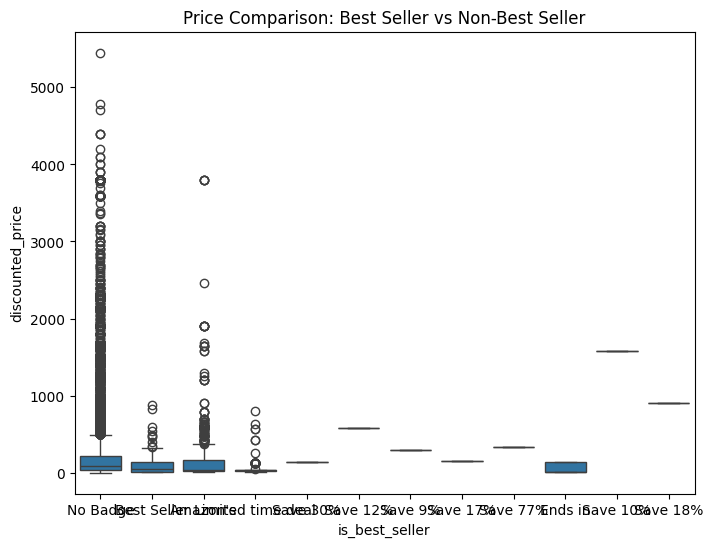

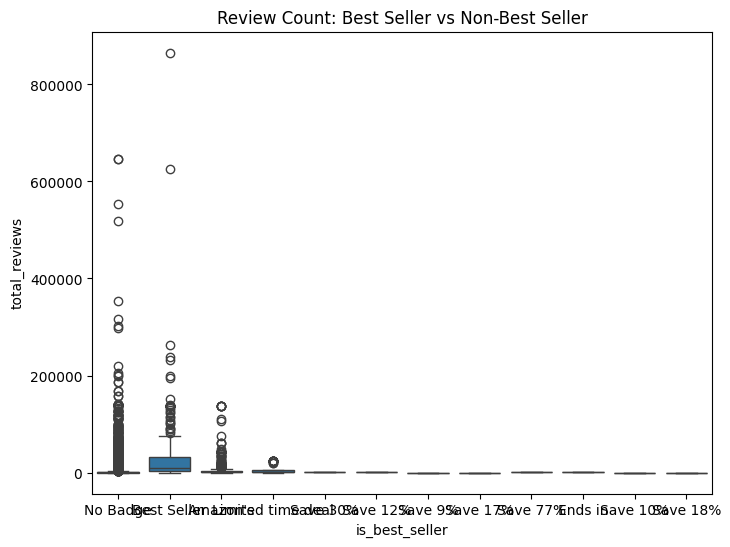

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x='is_best_seller', y='discounted_price', data=df)
plt.title('Price Comparison: Best Seller vs Non-Best Seller')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='is_best_seller', y='total_reviews', data=df)
plt.title('Review Count: Best Seller vs Non-Best Seller')
plt.show()


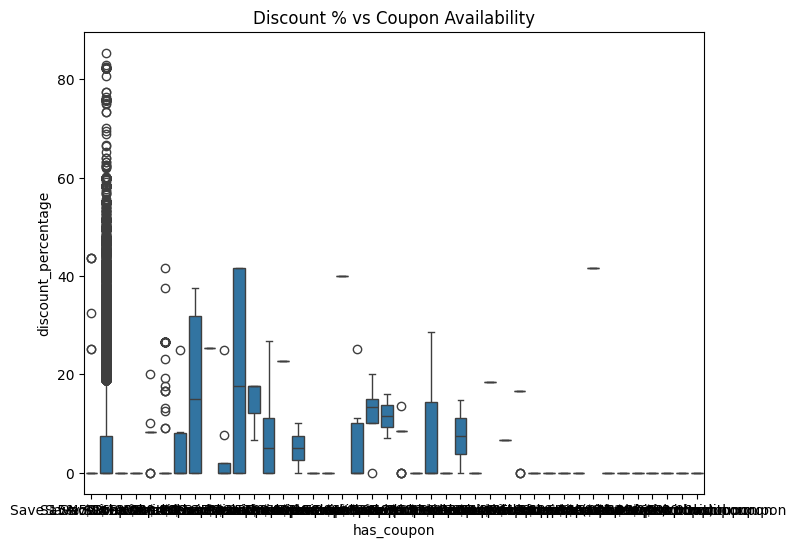

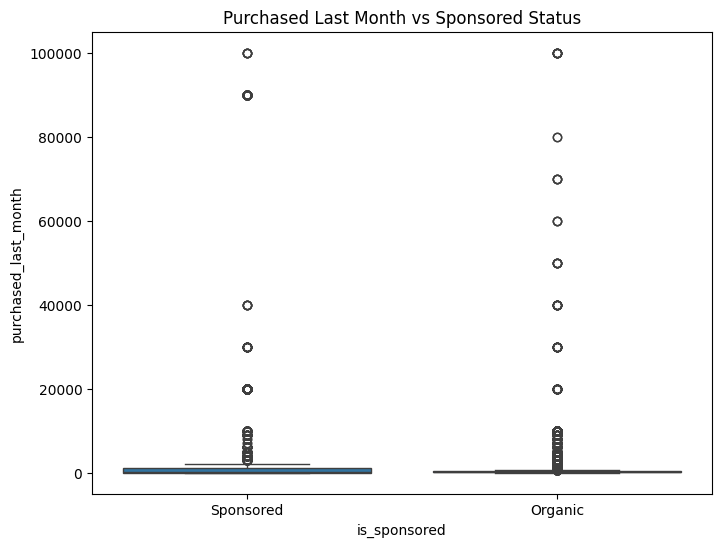

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='has_coupon', y='discount_percentage', data=df)
plt.title('Discount % vs Coupon Availability')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='is_sponsored', y='purchased_last_month', data=df)
plt.title('Purchased Last Month vs Sponsored Status')
plt.show()


In [32]:
# Summary statistics for numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_rating,42675.0,4.401844,0.382636,1.000000,4.200000,4.500000,4.600000,5.000000e+00
total_reviews,42675.0,3021.260316,12880.020115,1.000000,84.000000,343.000000,1825.500000,8.655980e+05
purchased_last_month,42675.0,975.031049,5513.522941,0.000000,50.000000,100.000000,300.000000,1.000000e+05
discounted_price,42675.0,235.912133,462.959608,2.160000,29.990000,89.950000,216.660000,5.449000e+03
original_price,42675.0,249.600944,485.832603,2.160000,33.990000,89.950000,219.000000,5.449000e+03
discount_percentage,42675.0,6.230771,12.512043,0.000000,0.000000,0.000000,7.407682,8.541559e+01
purchased_last_month_missing,42675.0,0.246303,0.430862,0.000000,0.000000,0.000000,0.000000,1.000000e+00
delivery_date_missing,42675.0,0.280797,0.449394,0.000000,0.000000,0.000000,1.000000,1.000000e+00
log_total_reviews,42675.0,5.923539,2.191483,0.693147,4.442651,5.840642,7.510157,1.367118e+01
log_purchased_last_month,42675.0,4.067690,2.609267,0.000000,3.931826,4.615121,5.707110,1.151294e+01


In [33]:
categorical_cols = ['is_best_seller', 'is_sponsored', 'has_coupon',
                    'buy_box_availability', 'product_category']

for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-"*50)

Unique values in is_best_seller:
['No Badge' 'Best Seller' "Amazon's" 'Limited time deal' 'Save 30%'
 'Save 12%' 'Save 9%' 'Save 17%' 'Save 77%' 'Ends in' 'Save 10%'
 'Save 18%']
--------------------------------------------------
Unique values in is_sponsored:
['Sponsored' 'Organic']
--------------------------------------------------
Unique values in has_coupon:
['Save 15%  with coupon' 'No Coupon' 'Save 50%  with coupon'
 'Save $16.00  with coupon' 'Save $10.00  with coupon'
 'Save 10%  with coupon' 'Save $20.00  with coupon'
 'Save $4.00  with coupon' 'Save $0.33  with coupon'
 'Save $18.00  with coupon' 'Save 5%  with coupon'
 'Save $2.00  with coupon' 'Save $15.00  with coupon'
 'Save 6%  with coupon' 'Save $8.00  with coupon'
 'Save $40.00  with coupon' 'Save $1.50  with coupon'
 'Save 7%  with coupon' 'Save 20%  with coupon' 'Save $1.00  with coupon'
 'Save $5.00  with coupon' 'Save $30.00  with coupon'
 'Save $12.00  with coupon' 'Save 25%  with coupon'
 'Save $133.00  with coup

# **Correlation Analysis**

['product_rating', 'total_reviews', 'purchased_last_month', 'discounted_price', 'original_price', 'discount_percentage', 'purchased_last_month_missing', 'delivery_date_missing', 'log_total_reviews', 'log_purchased_last_month', 'log_original_price', 'log_discounted_price', 'revenue']


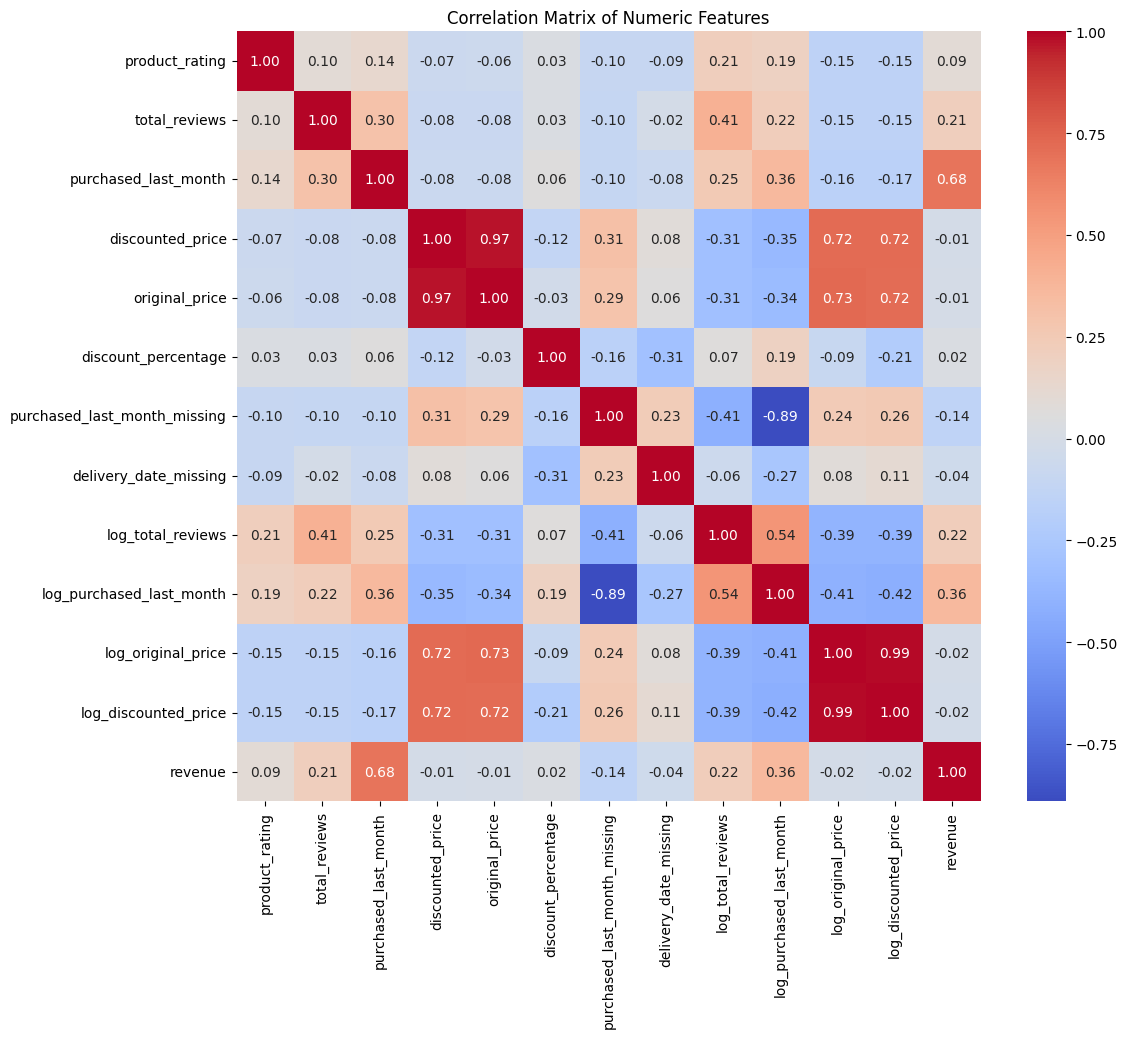

Features most correlated with purchased_last_month:
 purchased_last_month            1.000000
revenue                         0.683542
log_purchased_last_month        0.359846
total_reviews                   0.300323
log_total_reviews               0.249822
product_rating                  0.135410
discount_percentage             0.059997
original_price                 -0.075048
discounted_price               -0.075112
delivery_date_missing          -0.077063
purchased_last_month_missing   -0.101095
log_original_price             -0.163123
log_discounted_price           -0.165992
Name: purchased_last_month, dtype: float64


In [34]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Drop columns with zero variance (only 1 unique value)
numeric_cols = [col for col in numeric_cols if df[col].nunique() > 1]

# Check final numeric columns
print(numeric_cols)

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Sort correlation with target
corr_with_target = corr_matrix['purchased_last_month'].sort_values(ascending=False)
print("Features most correlated with purchased_last_month:\n", corr_with_target)


# **Encoding**

In [35]:
# 1. Best seller: 1 if product is Best Seller, else 0
df['best_seller'] = (df['is_best_seller'] == 'Best Seller').astype(int)

# 2. Sponsored: 1 if Sponsored, 0 if Organic
df['sponsored'] = df['is_sponsored'].map({'Sponsored': 1, 'Organic': 0})

# 3. Coupon availability: 1 if any coupon exists, 0 if 'No Coupon'
df['coupon_available'] = df['has_coupon'].apply(lambda x: 0 if 'No Coupon' in x else 1)

# 4. Buy Box: 1 if 'Add to cart', 0 if 'Not Added'
df['buy_box'] = df['buy_box_availability'].map({'Add to cart': 1, 'Not Added': 0})

# 5. Product category: One-Hot Encoding, drop first to avoid dummy variable trap
df = pd.get_dummies(df, columns=['product_category'], drop_first=True)

# Drop original columns that are now encoded
df.drop(['is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability'], axis=1, inplace=True)

# Check updated columns
df.columns

Index(['product_title', 'product_rating', 'total_reviews',
       'purchased_last_month', 'discounted_price', 'original_price',
       'delivery_date', 'product_image_url', 'product_page_url',
       'data_collected_at', 'discount_percentage',
       'purchased_last_month_missing', 'delivery_date_missing',
       'log_total_reviews', 'log_purchased_last_month', 'log_original_price',
       'log_discounted_price', 'revenue', 'best_seller', 'sponsored',
       'coupon_available', 'buy_box', 'product_category_Chargers & Cables',
       'product_category_Gaming', 'product_category_Headphones',
       'product_category_Laptops', 'product_category_Networking',
       'product_category_Other Electronics', 'product_category_Phones',
       'product_category_Power & Batteries',
       'product_category_Printers & Scanners', 'product_category_Smart Home',
       'product_category_Speakers', 'product_category_Storage',
       'product_category_TV & Display', 'product_category_Wearables'],
      d

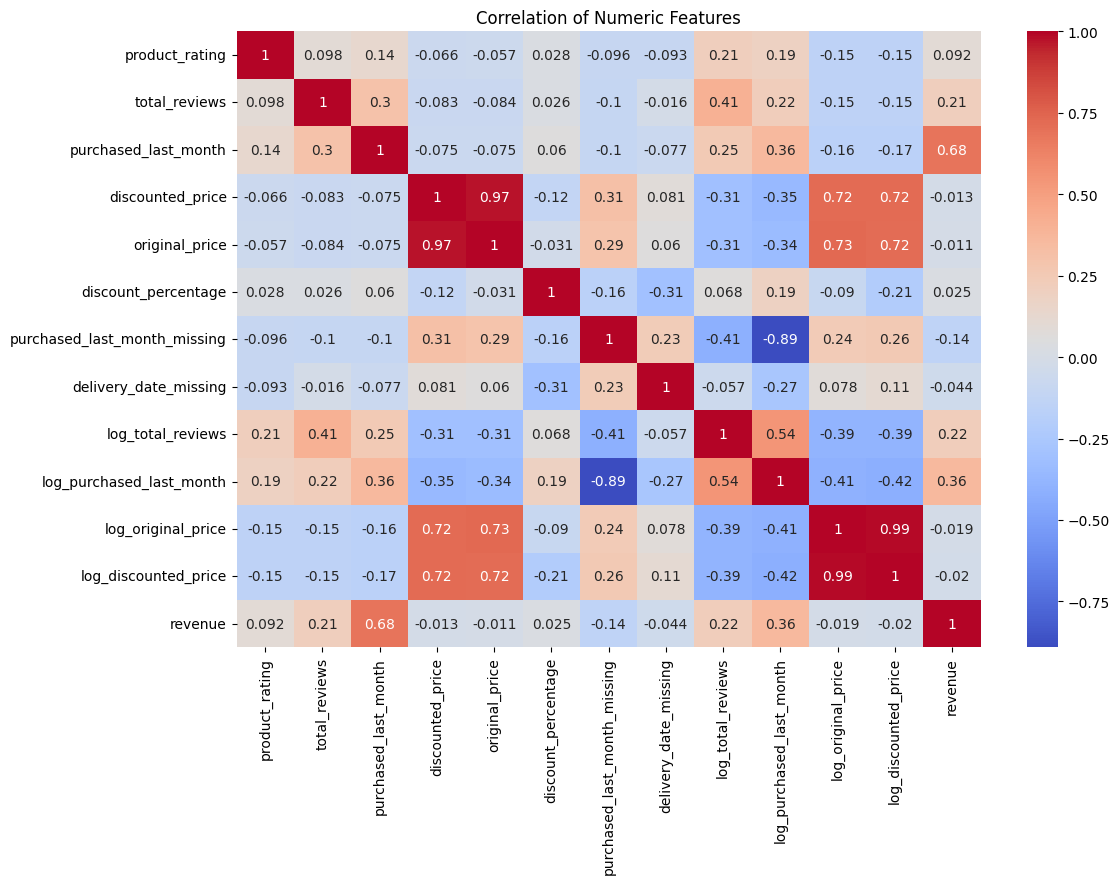

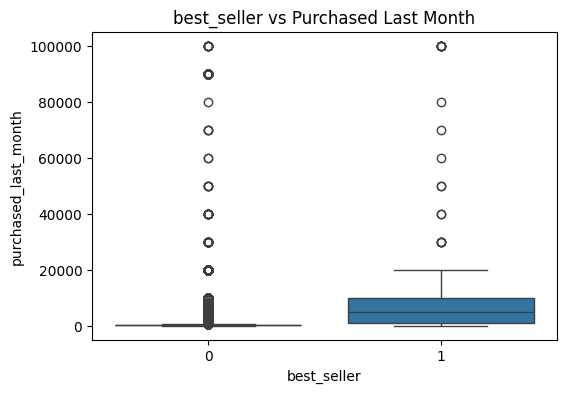

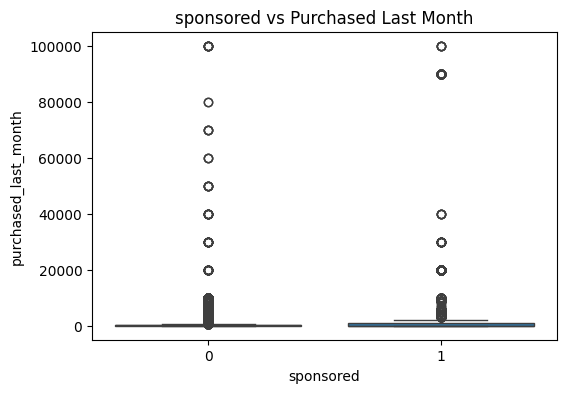

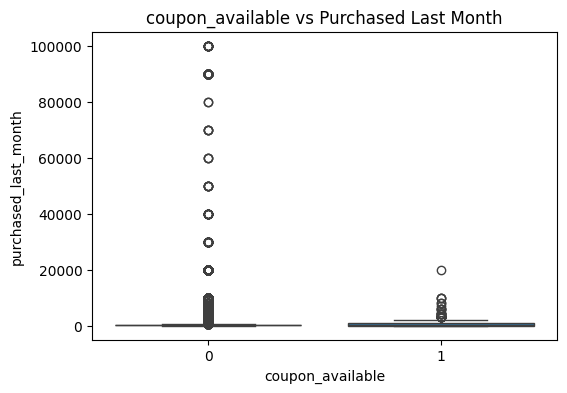

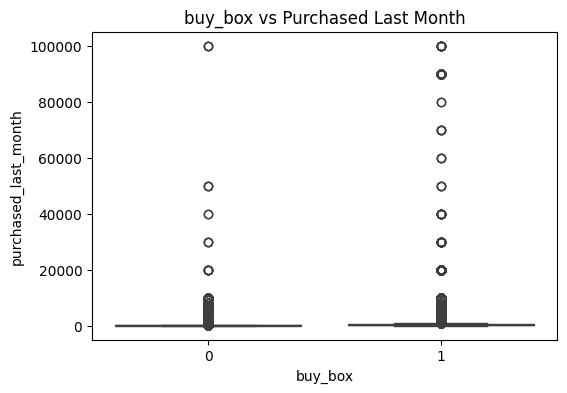

In [36]:
# Correlation heatmap to check numeric relationships
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Numeric Features')
plt.show()

# Binary features vs purchased_last_month
binary_cols = ['best_seller', 'sponsored', 'coupon_available', 'buy_box']
for col in binary_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=df['purchased_last_month'])
    plt.title(f'{col} vs Purchased Last Month')
    plt.show()

# **Feature Engineering**

In [37]:
one_hot_cols = [col for col in df.columns if 'product_category_' in col]
category_revenue = {}

for col in one_hot_cols:
    category_revenue[col] = df.loc[df[col] == 1, 'revenue'].sum()

category_revenue = pd.Series(category_revenue).sort_values(ascending=False)
print(category_revenue)

product_category_Power & Batteries      550791872.5
product_category_Laptops                318852032.0
product_category_Phones                 254171825.0
product_category_Other Electronics      146488562.0
product_category_TV & Display            60443898.0
product_category_Storage                 41243212.5
product_category_Chargers & Cables       37006835.5
product_category_Networking              28457234.5
product_category_Printers & Scanners     24307263.0
product_category_Headphones              20113830.5
product_category_Wearables               18997914.5
product_category_Speakers                18824166.5
product_category_Gaming                  13286185.0
product_category_Smart Home              12626827.5
dtype: float64


In [38]:
# Prepare ML-Ready Dataset
# Keep all relevant numerical and encoded features
ml_df = df.copy()

# Check ML-ready dataset
print("ML-Ready Dataset Sample:")
print(ml_df.head())

print("\nColumns included for modeling:")
print(ml_df.columns)

ML-Ready Dataset Sample:
                                       product_title  product_rating  \
0  BOYA BOYALINK 2 Wireless Lavalier Microphone f...             4.6   
1  LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...             4.3   
2  DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...             4.6   
3  Apple AirPods Pro 2 Wireless Earbuds, Active N...             4.6   
4  Apple AirTag 4 Pack. Keep Track of and find Yo...             4.8   

   total_reviews  purchased_last_month  discounted_price  original_price  \
0          375.0                 300.0             89.68          159.00   
1         2457.0                6000.0              9.99           15.99   
2         3044.0                2000.0            314.00          349.00   
3        35882.0               10000.0            162.24          162.24   
4        28988.0               10000.0             72.74           72.74   

  delivery_date                                  product_image_url  \
0    2025-09-01

In [39]:
# Discount ratio
ml_df['discount_ratio'] = (ml_df['original_price'] - ml_df['discounted_price']) / ml_df['original_price']

# Reviews per purchase
# Avoid division by zero by replacing 0 temporarily with NaN
ml_df['reviews_per_purchase'] = ml_df['total_reviews'] / ml_df['purchased_last_month'].replace(0, np.nan)

# Replace any inf or NaN with 0 safely (no inplace chained assignment)
ml_df['reviews_per_purchase'] = ml_df['reviews_per_purchase'].replace([np.inf, -np.inf], 0)
ml_df['reviews_per_purchase'] = ml_df['reviews_per_purchase'].fillna(0)


# **Select Features for Modeling**

In [40]:
numeric_features = ['product_rating', 'total_reviews', 'purchased_last_month',
                    'discounted_price', 'original_price', 'discount_ratio',
                    'reviews_per_purchase', 'log_total_reviews',
                    'log_purchased_last_month', 'log_original_price', 'log_discounted_price']

binary_features = ['best_seller', 'sponsored', 'coupon_available', 'buy_box']

category_features = [col for col in ml_df.columns if col.startswith('product_category_')]

features = numeric_features + binary_features + category_features


# **Regression Modeling (Revenue Prediction)**

# Model Comparision

In [41]:
!pip install xgboost

In [42]:
# Model Comparison: LR, RF, GBR, XGBR

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = ml_df[features]
y = ml_df['revenue']  # target for regression

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models and results
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, eval_metric='rmse')
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R2_Score': r2})

# Display comparison table
results_df = pd.DataFrame(results).sort_values(by='R2_Score', ascending=False)
print("Model Comparison:")
print(results_df)


Model Comparison:
               Model          RMSE  R2_Score
3            XGBoost  11268.041848  0.994189
2  Gradient Boosting  11934.472905  0.993482
1      Random Forest  18447.804289  0.984425
0  Linear Regression  96751.990561  0.571597


**Best Model:** XGBoost(Based on Comparision Table)

**Reasons:**

**Lowest RMSE (11,268)**

Predicts revenue more accurately than other models.

**Highest R² (0.994)**

Explains 99.4% of variance in revenue.

Indicates it captures the non-linear relationships between features and revenue better than linear regression or other tree-based models.

**Handles Non-linearities and Feature Interaction**s

Revenue depends on multiplicative relationships (e.g., discounted_price × purchased_last_month) and category interactions.

XGBoost handles these effectively.

**Stable & Efficient**

Performs better than Gradient Boosting and Random Forest in this case, likely due to better regularization and boosting strategy.

Top Features Influencing Revenue:
                                 Feature  Importance
2                   purchased_last_month    0.609149
3                       discounted_price    0.269348
4                         original_price    0.050697
23  product_category_Printers & Scanners    0.036246
14                               buy_box    0.016874
0                         product_rating    0.005678
5                         discount_ratio    0.004437
1                          total_reviews    0.001965
11                           best_seller    0.001281
12                             sponsored    0.001276


/tmp/ipython-input-286176928.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')


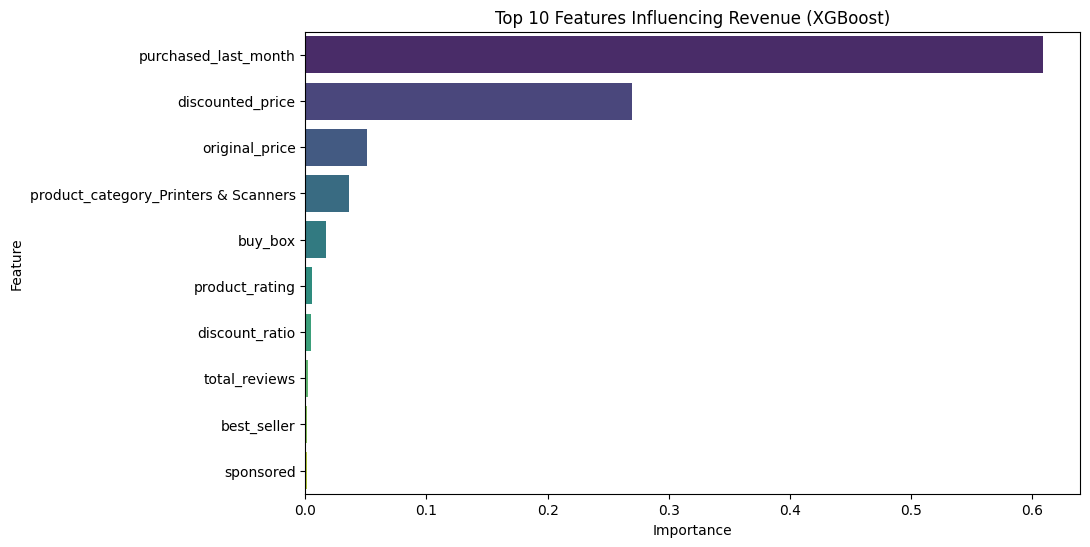

In [43]:
# Feature Importance for XGBoost

# Select XGBoost model from the dictionary
xgb_model = models['XGBoost']

# Get feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Features Influencing Revenue:")
print(importances.head(10))

# Optional: Visualize feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')
plt.title("Top 10 Features Influencing Revenue (XGBoost)")
plt.show()


# **Forecasting Next Year Revenue (without purchased_last_month)**
(Since purchased_last_month is not known for the next festive season, we need a realistic prediction model)

In [44]:
# Drop features directly tied to current purchases
features_forecast = [f for f in features if f != 'purchased_last_month' and f != 'log_purchased_last_month']

X_fc = ml_df[features_forecast]
y_fc = ml_df['revenue']

# Train-test split
X_train_fc, X_test_fc, y_train_fc, y_test_fc = train_test_split(X_fc, y_fc, test_size=0.2, random_state=42)

# Train XGBoost
xgb_fc = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, eval_metric='rmse')
xgb_fc.fit(X_train_fc, y_train_fc)

# Predictions
y_pred_fc = xgb_fc.predict(X_test_fc)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
rmse_fc = np.sqrt(mean_squared_error(y_test_fc, y_pred_fc))
r2_fc = r2_score(y_test_fc, y_pred_fc)

print(f"Forecasting Model (without purchased_last_month) -> RMSE: {rmse_fc:.2f}, R²: {r2_fc:.2f}")

# Feature importance for forecasting
importances_fc = pd.DataFrame({
    'Feature': X_fc.columns,
    'Importance': xgb_fc.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features Influencing Revenue (Forecasting Model):")
print(importances_fc.head(10))


Forecasting Model (without purchased_last_month) -> RMSE: 38667.35, R²: 0.93

Top Features Influencing Revenue (Forecasting Model):
                               Feature  Importance
5                 reviews_per_purchase    0.243105
2                     discounted_price    0.153637
9                          best_seller    0.135590
1                        total_reviews    0.124484
20  product_category_Power & Batteries    0.098003
3                       original_price    0.085844
0                       product_rating    0.042436
16            product_category_Laptops    0.028467
4                       discount_ratio    0.022003
19             product_category_Phones    0.012246


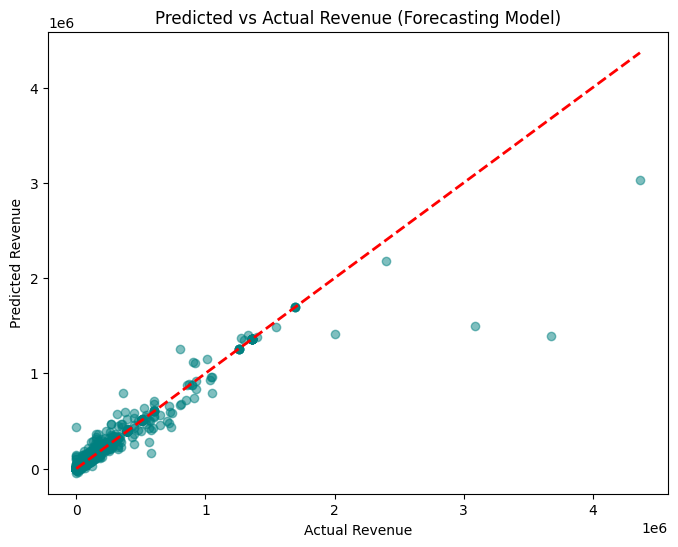

In [45]:
# Predicted vs Actual Revenue Plot

plt.figure(figsize=(8,6))
plt.scatter(y_test_fc, y_pred_fc, alpha=0.5, color='teal')
plt.plot([y_test_fc.min(), y_test_fc.max()], [y_test_fc.min(), y_test_fc.max()], 'r--', linewidth=2)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Predicted vs Actual Revenue (Forecasting Model)")
plt.show()


# **Product Segmentation (Clustering)**

In [46]:
# Select Features for Clustering
from sklearn.preprocessing import StandardScaler

# Features to segment products
cluster_features = ['total_reviews', 'purchased_last_month', 'discounted_price', 'product_rating']

X_cluster = ml_df[cluster_features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

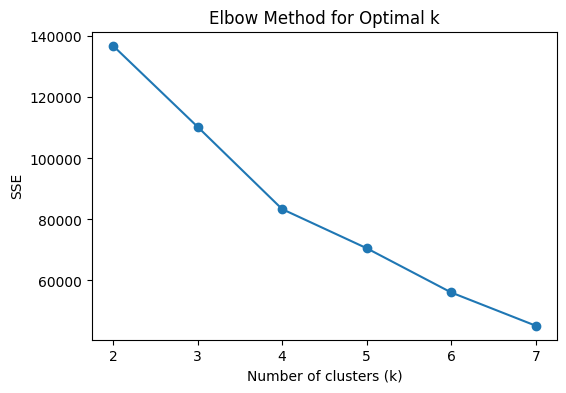

In [47]:
# Determine Optimal Number of Clusters (Elbow Method)
from sklearn.cluster import KMeans

sse = []
k_range = range(2, 8)  # try 2-7 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [48]:
# optimal k=4
kmeans = KMeans(n_clusters=4, random_state=42)
ml_df['cluster'] = kmeans.fit_predict(X_scaled)

# View cluster counts
ml_df['cluster'].value_counts()

,count
cluster,
0,30120
2,10811
3,1598
1,146


In [49]:
# Aggregate by cluster to see characteristics
cluster_summary = ml_df.groupby('cluster')[cluster_features].mean()
print(cluster_summary)

         total_reviews  purchased_last_month  discounted_price  product_rating
cluster                                                                       
0          3448.349270            953.708499        149.896979        4.576829
1         90135.883562          75677.397260         18.234932        4.772603
2          1072.866062            167.435945        199.352602        3.895440
3           193.623279             15.456821       2124.399255        4.495745


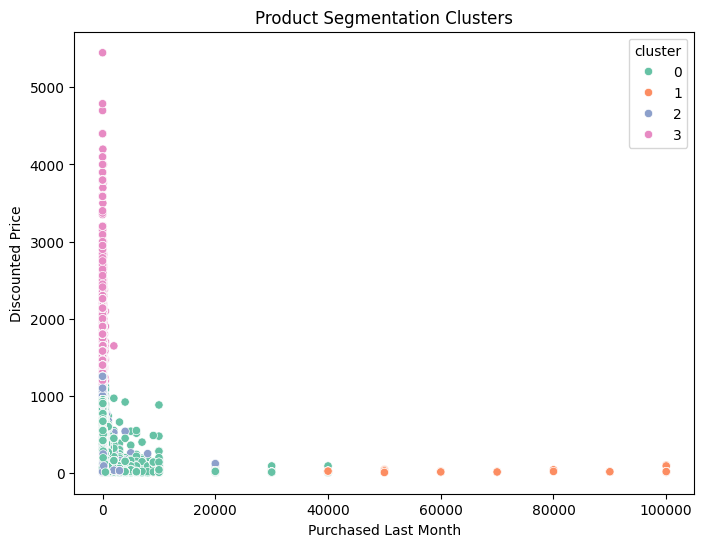

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='purchased_last_month', y='discounted_price', hue='cluster', data=ml_df, palette='Set2')
plt.title('Product Segmentation Clusters')
plt.xlabel('Purchased Last Month')
plt.ylabel('Discounted Price')
plt.show()

# **Trending Product Recommendation**

In [51]:
# Add forecasted revenue to the dataset
ml_df['predicted_revenue'] = xgb_fc.predict(X_fc)


In [52]:
top_n = 5

# Sort by cluster and predicted_revenue descending
ml_df_sorted = ml_df.sort_values(['cluster', 'predicted_revenue'], ascending=[True, False])

# Take top N per cluster using groupby.head()
trending_products = ml_df_sorted.groupby('cluster', group_keys=False).head(top_n).reset_index(drop=True)


In [53]:
# Prepare recommendation table
recommendation_table = trending_products[[
    'product_title', 'cluster', 'predicted_revenue',
    'discounted_price', 'product_rating', 'discount_percentage'
]]

# Sort by cluster and predicted revenue
recommendation_table = recommendation_table.sort_values(
    ['cluster', 'predicted_revenue'], ascending=[True, False]
)
recommendation_table.reset_index(drop=True, inplace=True)

# Display recommendation table
print("Top Trending Products per Cluster:")
display(recommendation_table)


Top Trending Products per Cluster:


,product_title,cluster,predicted_revenue,discounted_price,product_rating,discount_percentage
0,Apple 2025 MacBook Air 13-inch Laptop with M4 ...,0,8.817061e+06,880.95,4.8,0.000000
1,"AMD RYZEN 7 9800X3D 8-Core, 16-Thread Desktop ...",0,4.783192e+06,476.50,4.8,0.000000
2,"Energizer Ultimate Lithium AA Batteries Pack, ...",0,3.497991e+06,89.95,4.7,0.000000
3,Meta Quest 3 512GB | Thirty Percent Sharper Re...,0,3.033888e+06,485.05,4.5,0.000000
4,Apple AirPods Max Wireless Over-Ear Headphones...,0,3.028416e+06,549.15,4.6,0.000000
5,Texas Instruments TI-84 Plus CE Color Graphing...,1,9.991958e+06,99.95,4.6,0.000000
6,Duracell 2032 Lithium Battery. 4 Count Pack. C...,1,9.018922e+06,89.95,4.7,0.000000
7,"Amazon Basics Multipurpose Copy Printer Paper,...",1,3.156356e+06,39.97,4.8,0.000000
8,HP 67 Black/Tri-color Ink Cartridges for HP Pr...,1,2.208026e+06,43.89,4.6,0.000000
9,HP 67XL Black High-yield Ink Cartridge | Works...,1,1.816448e+06,35.89,4.6,0.000000


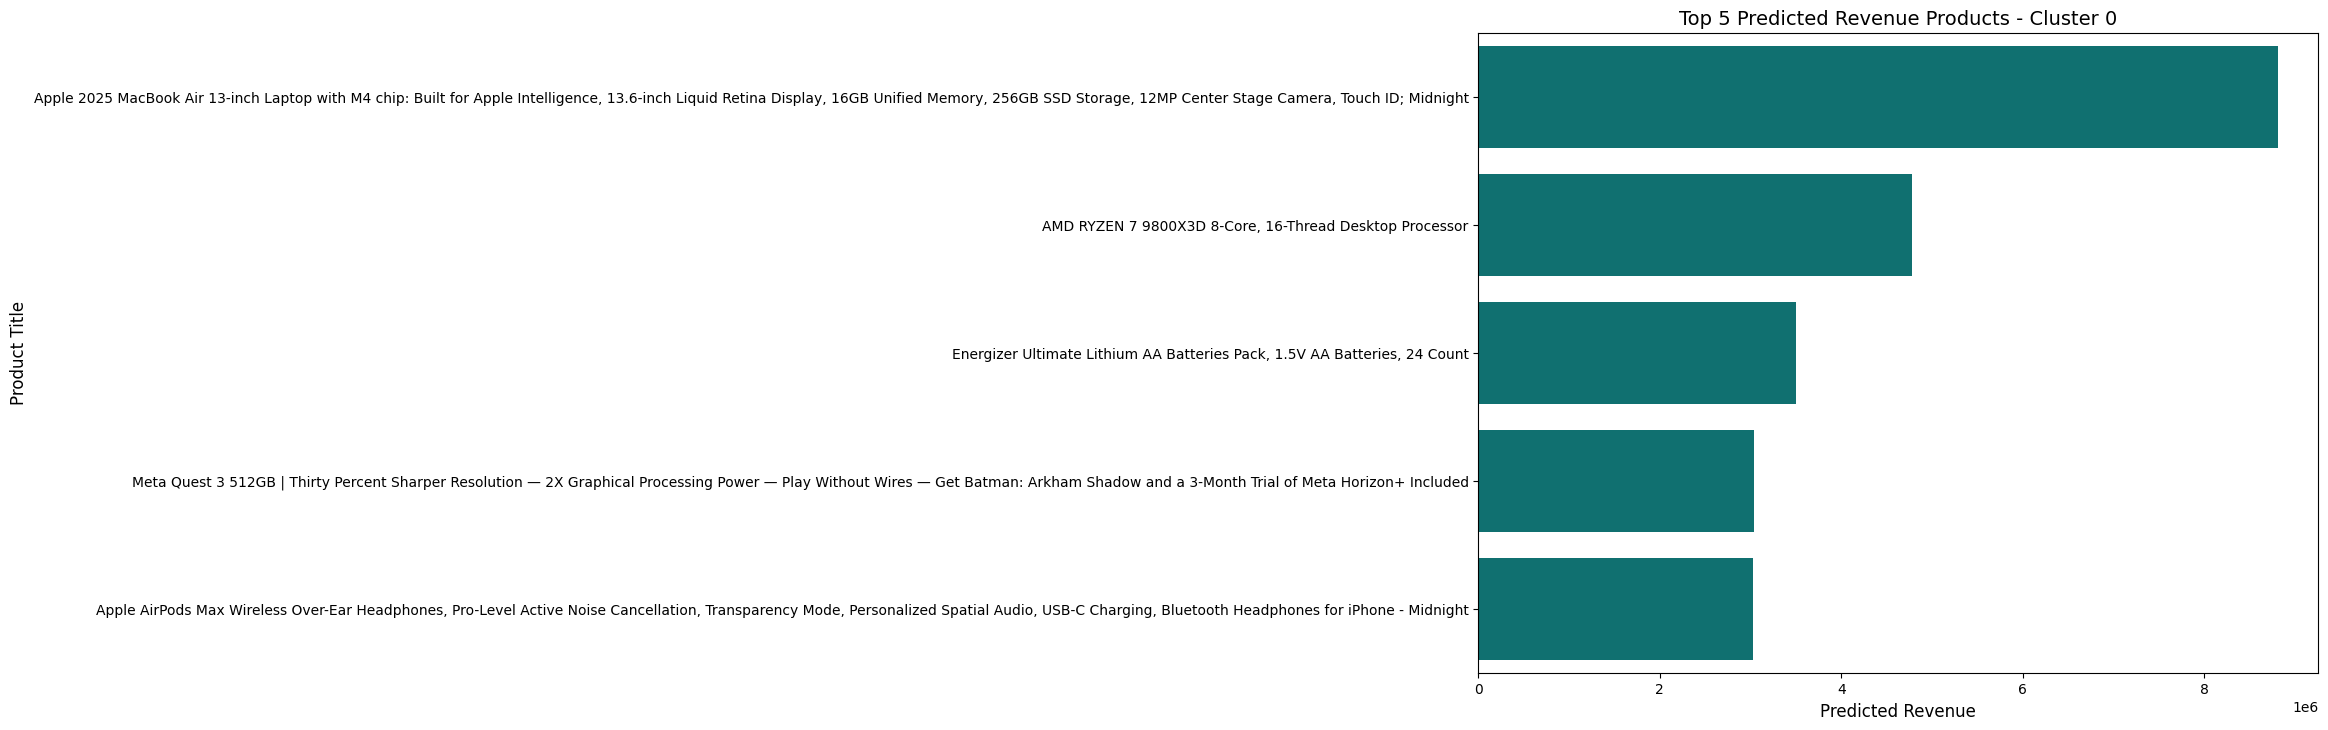

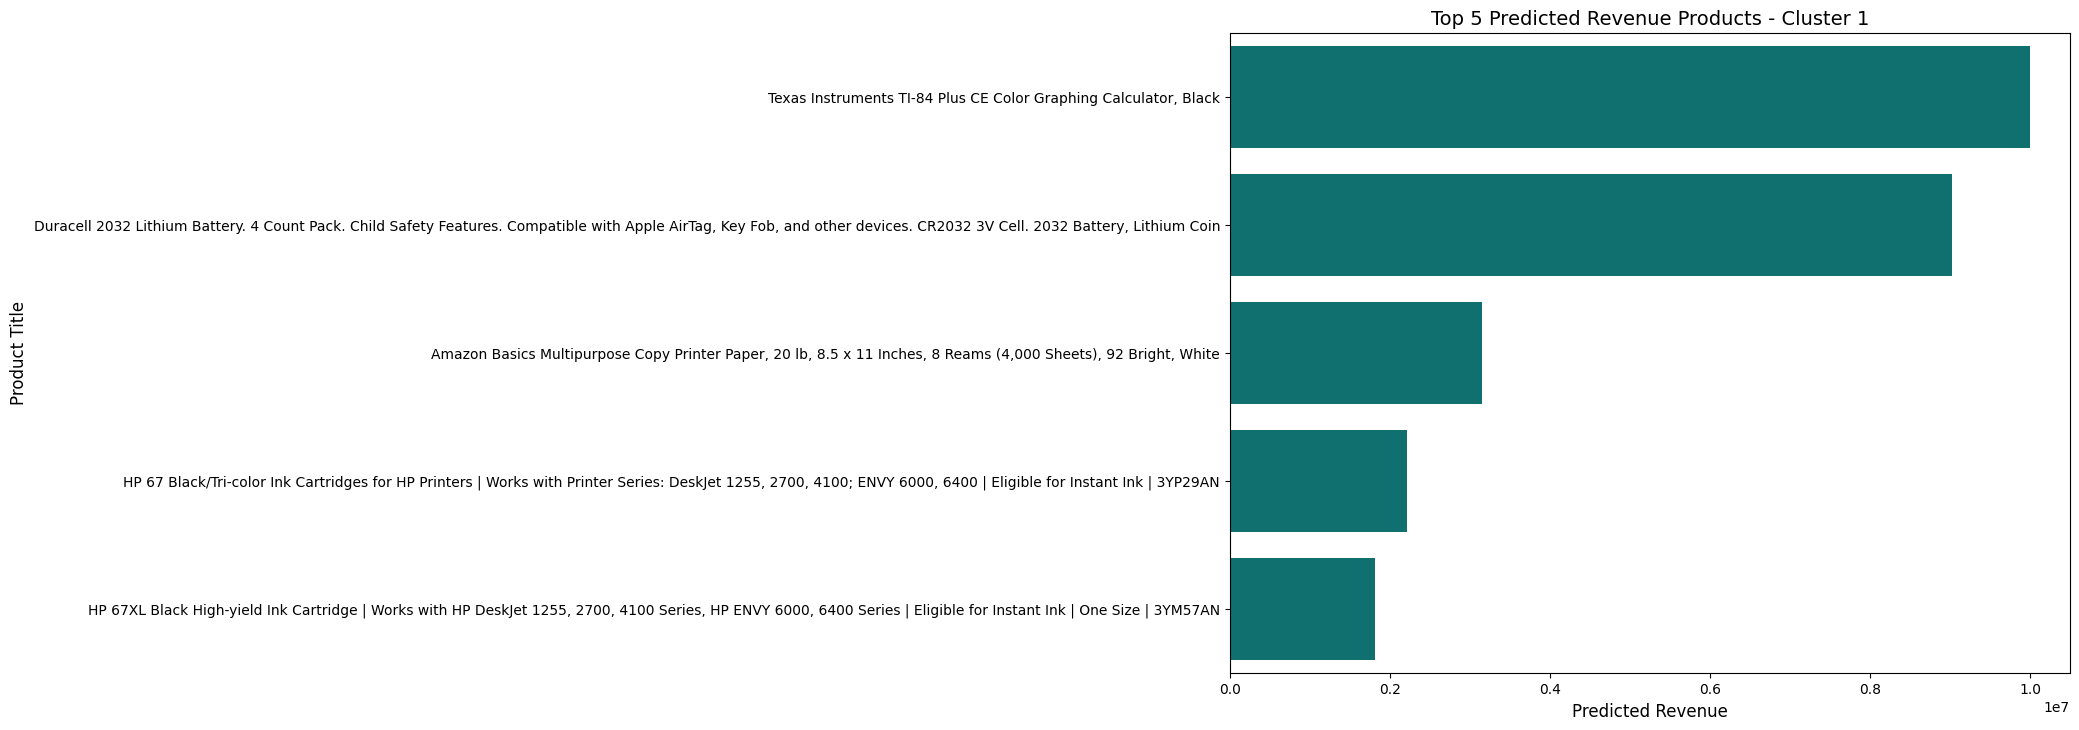

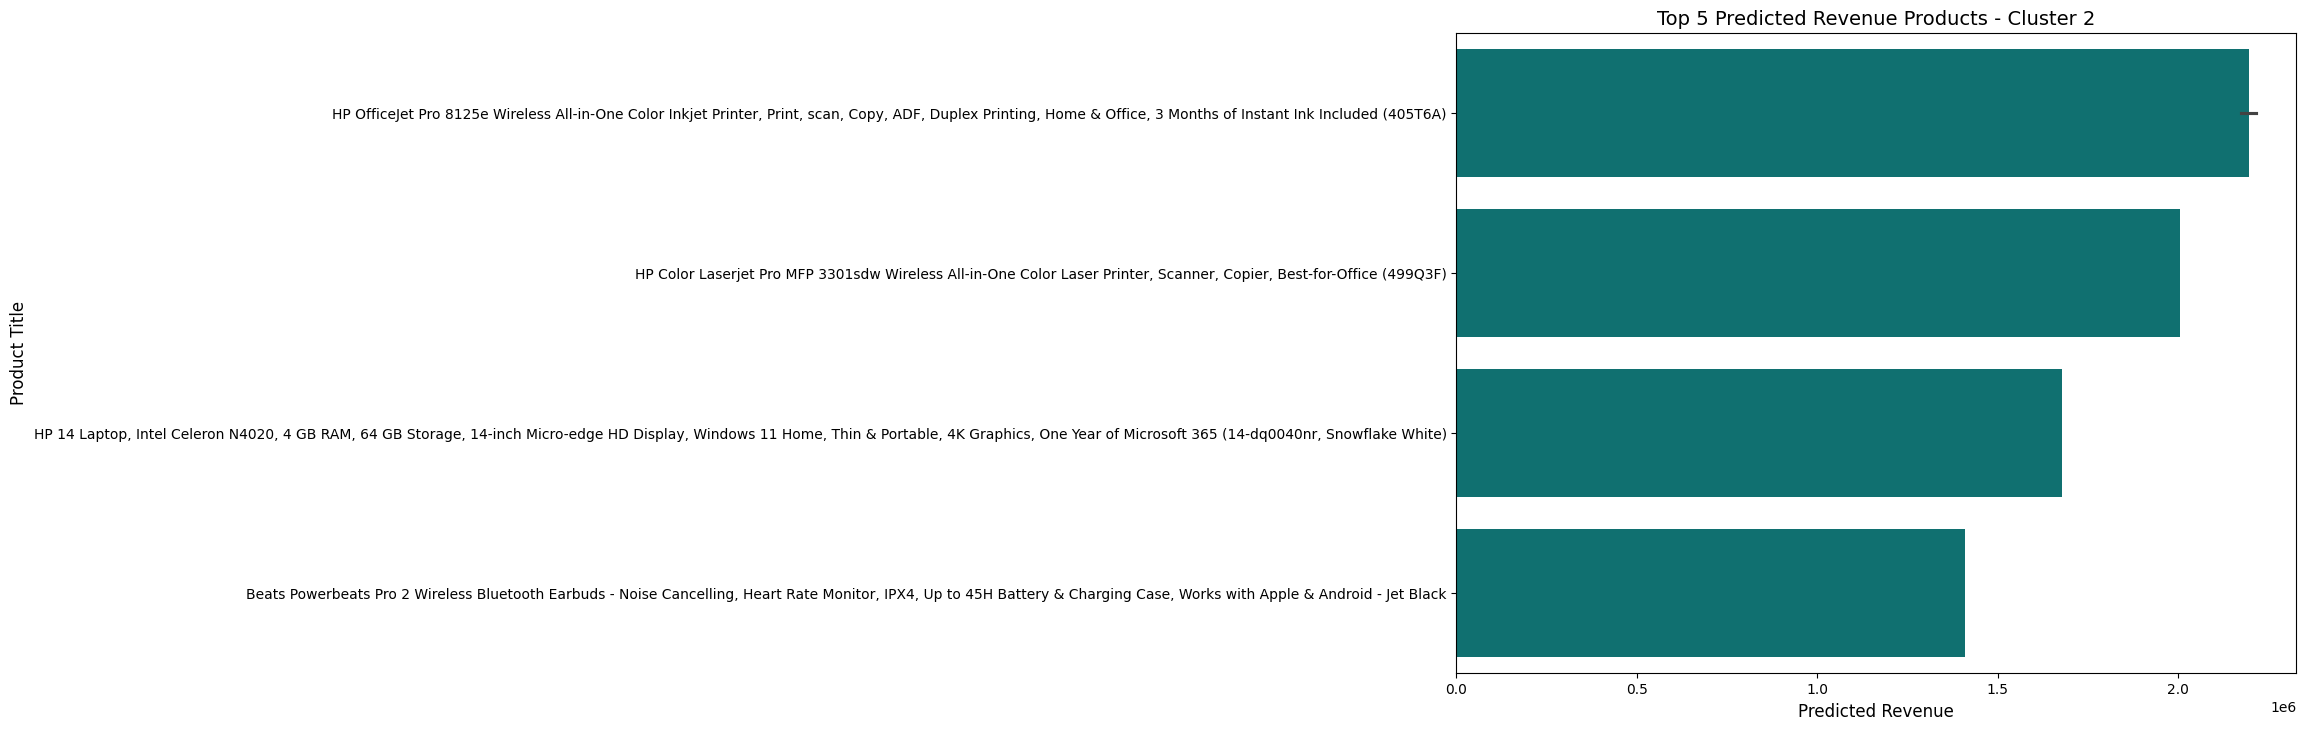

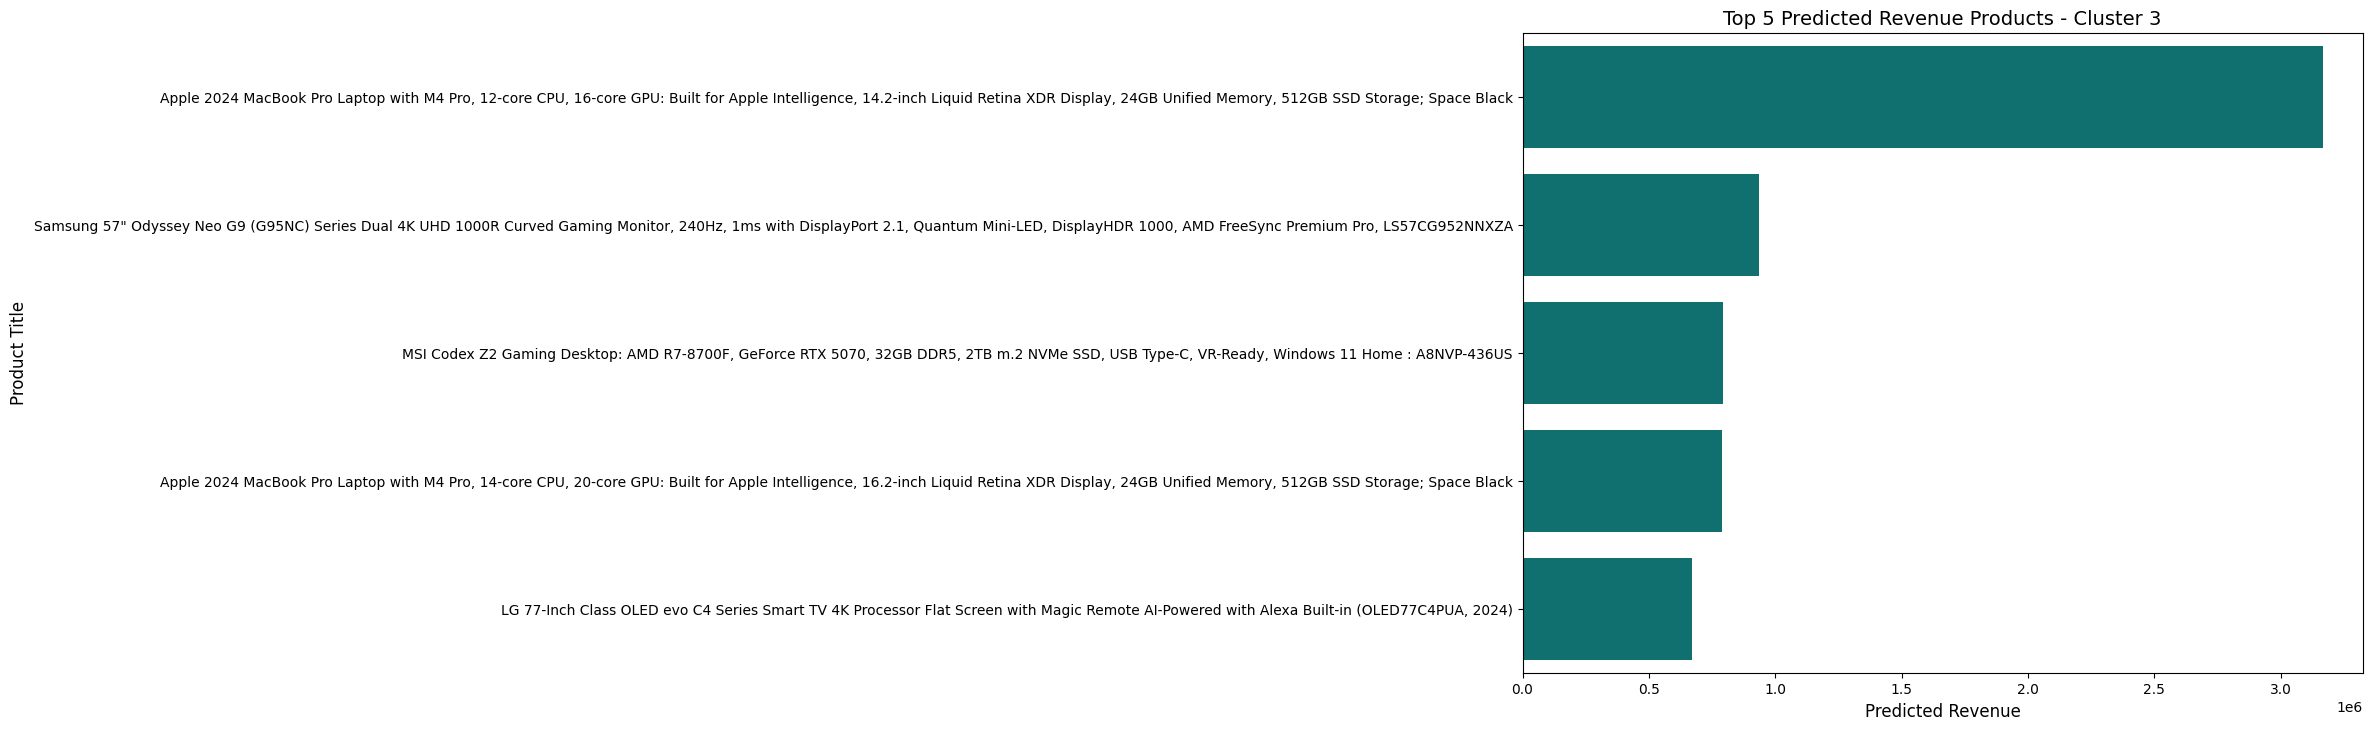

In [54]:
# Visualize top trending products per cluster
for c in recommendation_table['cluster'].unique():
    cluster_data = recommendation_table[recommendation_table['cluster'] == c]

    plt.figure(figsize=(14,8))
    sns.barplot(
        x='predicted_revenue',
        y='product_title',
        data=cluster_data.head(top_n),
        color='teal'
    )
    plt.title(f'Top {top_n} Predicted Revenue Products - Cluster {c}', fontsize=14)
    plt.xlabel('Predicted Revenue', fontsize=12)
    plt.ylabel('Product Title', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Manually adjust margins to avoid tight_layout warnings
    plt.subplots_adjust(left=0.35, right=0.95, top=0.9, bottom=0.1)

    plt.show()


In [55]:
# Cluster Summary for Stakeholders
cluster_summary = ml_df.groupby('cluster')[['discounted_price', 'product_rating', 'total_reviews', 'predicted_revenue']].mean()
print("\nCluster Summary (Average Metrics):")
display(cluster_summary)


Cluster Summary (Average Metrics):


,discounted_price,product_rating,total_reviews,predicted_revenue
cluster,,,,
0,149.896979,4.576829,3448.349270,3.948076e+04
1,18.234932,4.772603,90135.883562,1.307880e+06
2,199.352602,3.895440,1072.866062,1.936673e+04
3,2124.399255,4.495745,193.623279,2.718873e+04


In [56]:
# Create folders for export
import os
os.makedirs("/content/drive/MyDrive/Projects/Amazon_Dashboard/data", exist_ok=True)
os.makedirs("/content/drive/MyDrive/Projects/Amazon_Dashboard/models", exist_ok=True)

# Save cleaned dataset
df.to_csv("/content/drive/MyDrive/Projects/Amazon_Dashboard/data/amazon_products_sales_data_cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")

# Save trained XGBoost model
import joblib
try:
    joblib.dump(models['XGBoost'], "/content/drive/MyDrive/Projects/Amazon_Dashboard/models/xgb_model.pkl")
    print("Model saved successfully!")
except Exception as e:
    print(f"Could not save model: {e}")

Cleaned dataset saved successfully!
Model saved successfully!
